# Load libraries

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Load data and analize size and type of information in each column

In [513]:
# load data
bcn_df = pd.read_csv('../data/raw/barcelona_listings_kagel.csv')
#bcn_df.columns
#bcn_df.head
#print(bcn_df) # 19k rows  106 cols
print ('Understanding the data set')
print('The number of rows aand columns in the original data set is: ',bcn_df.shape)
print('The list of columns in the original data set is: ',bcn_df.columns)
#bcn_df.columns
print('The list of columns and their value types are: ', bcn_df.info())
#bcn_df.head()

"""
ALL COLUMN NAMES ARE ALREADY LOWER CASE AND HAVE NO WHITE SPACES
COLUMNS THAT CAN BE DIRECTLY REMOVED AS NO RELEVANT FOR THE ANALYSIS
COLUMN SQUARE FEET HARS ONLY 500 NON NULL VALUES SO IT NEEDS TO BE REMOVED
For example 'neighbourhood' and 'neighbourhood_cleansed' have the same information.
No need for country.
For 'square_feet' there are values for only 500 rows.
"""

columns_to_delete = ['picture_url','listing_url','host_url','host_name', 'host_has_profile_pic', 'host_picture_url','space','description','summary','access','neighborhood_overview','summary','country', 'host_has_profile_pic', 'square_feet','neighbourhood','street' ] 
bcn_df.drop(columns=columns_to_delete, inplace=True)

print('The number of rows and columns after deleting columns: ',bcn_df.shape)
bcn_df.nunique()
bcn_df.isna().sum()

"""
    RENAME SOME OF THE KEY COLUMNS
"""
bcn_df.rename(columns={'host_since': 'listed_date'}, inplace = True)
bcn_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace = True)
bcn_df.rename(columns={'neighbourhood_group_cleansed': 'area'}, inplace = True)
print(bcn_df.info())

df1 = bcn_df.copy()
df1.columns

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3302529185.py:2: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.



Understanding the data set
The number of rows aand columns in the original data set is:  (19833, 62)
The list of columns in the original data set is:  Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'access', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'zipcode', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'square_feet', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availabilit

Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

# Column 'city': cleaning wrong values and filling nulls.

In [514]:
"""
    CHECK FOR UNIQUE VALUES IN COLUMN "CITY" - REMOVE WHITE SPACES AND ALL LOWER CASE.
"""
#print(bcn_df['city'].unique())
def city_lowercase(df):
    df['city'] = df['city'].str.lower().str.strip() 
    return df
df1 = city_lowercase(df1)

# Check if the replacement was successful
#print(df1['city'].unique())

"""
    EXCLUDE AREAS OUTSIDE THE 10 AREAS OF BARCELONA
"""
values_to_delete = ['sant adria de besos', 'st cugat del vallès', 'барселона',"l'hospitalet de llobregat" ,'hospitalet de llobregat','03-jan', 'sant adrià de besòs','巴塞罗那' ,'sant cugat del vallès' , '巴塞罗纳','sant adrià de besos' ,'hospitalet','badalona']
# Filter DF to exclude rows with the specified values
df1 = df1[~df1['city'].isin(values_to_delete)]
#print(df1['city'].unique())

"""
    REMAINING VALUES NEED TO BE ALL "barcelona" - REPLACE MISSPELLING
"""
new_value = 'barcelona'
df1['city'] = df1['city'].replace(['barcelonaneta','барселона','sagrada familia, barcelona' ,'barcelone','bcn' ,'barcelona, catalunya, es', 'barcelona el raval' ,'zona forum','barcelon' ,'83-93' ,'08028, barcelona' ,'gracia-barcelona', '.','sants-les corts' ,'eixample', 'les corts' ,'*','maragall- hospital de sant pau' ,'sants'], new_value)
#print(df1['city'].unique())

"""
    AFTER ALL CLEANSED CHECK FOR NULL VALUES AND REPLACE FOR "barcelona"
"""
null_count = df1['city'].isnull().sum()
df1['city'].fillna('barcelona', inplace=True)
# Check if the replacement was successful
null_cities = df1['city'].isnull().sum()
print(f"Number of null values in 'city' column after replacement: {null_cities}")
print(df1['city'].unique())

df2 = df1.copy()

Number of null values in 'city' column after replacement: 0
['barcelona']


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/225649308.py:32: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Column 'first_review' - date formated, deal with nulls and replace them for 'listed_date' if valid.

In [515]:
"""
    REFORMAT DATE FOR BOTH first_review AND host_since
"""
df2['first_review'] = pd.to_datetime(df2['first_review'], errors='coerce')
df2['listed_date'] = pd.to_datetime(df2['listed_date'], errors='coerce')
# Check for null values in the 'date' column
print(df2['listed_date'].unique())

"""
    CHECK FOR NULLS IN 'first_review' : IF NULL GIVE THE VALUE OF THE COLUMN host_since
"""
null_first_review = df2['first_review'].isnull().sum()
print(null_first_review )

def fill_first_review_with_host_since(row):
    if pd.isnull(row['first_review']) and pd.notnull(row['listed_date']):
        return row['listed_date']
    return row['first_review']

df2['first_review'] = df2.apply(fill_first_review_with_host_since, axis=1)

# Check if there are still null values in the 'first_review' column
null_count_after = df2['first_review'].isnull().sum()
print(f"Number of null values in 'first_review' after replacement: {null_count_after}")

# There are only 14 so delete those nulls.
null_count = df2['listed_date'].isnull().sum()
print(f"Number of null values in 'host_since'' after replacement: {null_count}")
df2.dropna(subset=['listed_date'], inplace=True)

df3=df2.copy()
df2.columns

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3951280598.py:5: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



<DatetimeArray>
['2010-01-19 00:00:00', '2010-02-18 00:00:00', '2010-04-14 00:00:00',
 '2010-05-29 00:00:00', '2010-06-02 00:00:00', '2010-06-09 00:00:00',
                 'NaT', '2010-01-24 00:00:00', '2010-06-25 00:00:00',
 '2010-07-05 00:00:00',
 ...
 '2019-07-04 00:00:00', '2017-12-28 00:00:00', '2013-11-20 00:00:00',
 '2019-07-05 00:00:00', '2019-07-06 00:00:00', '2019-07-07 00:00:00',
 '2019-07-08 00:00:00', '2015-03-27 00:00:00', '2014-12-26 00:00:00',
 '2019-07-09 00:00:00']
Length: 2803, dtype: datetime64[ns]
13342
Number of null values in 'first_review' after replacement: 19
Number of null values in 'host_since'' after replacement: 33


Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

# Column 'host_since' - date formated, deal with nulls and replace them for 'first_review' date.

In [516]:
"""
    APPLY DATE TIME FORMATTING
"""
df3['listed_date'] = pd.to_datetime(bcn_df['listed_date'], errors='coerce')
# Check for null values in the 'date' column
null_dates = df3['listed_date'].isnull().sum()
print(null_dates)
print(df1['listed_date'].unique())

"""
    CHECK FOR NULLS IN 'host_since' : IF NULL GIVE THE VALUE OF THE COLUMN 'first_review'
"""
def fill_host_since_with_first(row):
    if pd.isnull(row['listed_date']):
        return row['first_review']
    return row['listed_date']

df3['listed_date'] = df3.apply(fill_host_since_with_first, axis=1)
# Check if there are still null values in the 'first_review' column
null_host = df3['listed_date'].isnull().sum()
print(f"Number of null values in 'first_review' after replacement: {null_host}")

"""
    CRETE 2 NEW COLUMNS FOR 'listed_year' AND 'listed_month'
"""
df3['listed_year'] = df3['listed_date'].dt.year
df3['listed_month'] = df3['listed_date'].dt.month
print(df3[['listed_month', 'listed_year']].head())

df4 = df3.copy()
df3.columns

0
['19/01/2010' '18/02/2010' '14/04/2010' ... '27/03/2015' '26/12/2014'
 '09/07/2019']


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3986339004.py:4: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Number of null values in 'first_review' after replacement: 0
   listed_month  listed_year
0             1         2010
1             1         2010
2             2         2010
4             4         2010
5             5         2010


Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'listed_year', 'listed_month'],
      dtype='object')

# Column 'price' and 'cleaning_price'-convert to floats and clean format.

In [517]:
#price and cleaning fee need to be numbers, and null for price deleted
#print(bcn_df['cleaning_fee'].unique())

"""
    REMOVE THE $ SIGN AND OTHER SIMBOLS FOR BOTH PRICE AND CLEANING_FEE:
"""
def convert_to_float(value):
    if isinstance(value, int) or isinstance(value, float):
        return float(value)
    elif isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        return float(value)
    return value  # In case the value is already NaN or some other type

df4['price'] = df4['price'].apply(convert_to_float)
df4['cleaning_fee'] = df4['cleaning_fee'].apply(convert_to_float).round(2)
print(df4[['price', 'cleaning_fee']].head())
#print(df4['price'].unique())

"""
    CHECK FOR NULLS 
"""
null_price_count = df4['price'].isnull().sum()
print(f"Number of null values in 'price': {null_price_count}")
null_clean_count = df4['cleaning_fee'].isnull().sum()
print(f"Number of null values in cleaning_fee': {null_clean_count}")

"""
    FOR CLEANING_FEE FILL THE NULS. WITH THE AVRG. PER NEIGHBOURHOOD.
"""
neighbourhood_avg_cleaning_fee = df4.groupby('neighbourhood')['cleaning_fee'].transform('mean')

# Fill the null values in the 'cleaning_fee' column with the calculated neighborhood averages
df4['cleaning_fee'].fillna(neighbourhood_avg_cleaning_fee, inplace=True)
overall_avg_cleaning_fee = df4['cleaning_fee'].mean()
# Fill any remaining null values with the overall average cleaning fee
df4['cleaning_fee'].fillna(overall_avg_cleaning_fee, inplace=True)

# Verify that there are no null values left
final_clean_count = df4['cleaning_fee'].isnull().sum()
print(f"Number of null values in 'cleaning_fee' after filling: {final_clean_count}")

df5=df4.copy()
df4.columns


   price  cleaning_fee
0  130.0          42.0
1   60.0          50.0
2   33.0           NaN
4   45.0           NaN
5   42.0           NaN
Number of null values in 'price': 0
Number of null values in cleaning_fee': 4035
Number of null values in 'cleaning_fee' after filling: 0


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/808867627.py:34: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/808867627.py:37: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'listed_year', 'listed_month'],
      dtype='object')

# Column 'neighbourhood' and 'area'- check for nul values and duplicates

In [518]:
null = df5['area'].isnull().sum()
print(f"Number of null values in 'area': {null}")

null = df5['neighbourhood'].isnull().sum()
print(f"Number of null values in 'neighbourhood': {null}")
print(bcn_df['area'].nunique())
print(bcn_df['neighbourhood'].nunique())

Number of null values in 'area': 0
Number of null values in 'neighbourhood': 0
10
71


# Column 'zip_code' : clean format and fill nul values 

In [519]:
#zipcode should be numerical ( fill up nuls with nighbourhood code
#print(bcn_df['zipcode'].unique())
# Clean the 'zipcode' column
"""
    CLEAN 'zip_code' - VALUES SHOULD BE ONLY NUMERICAL
"""

df5['zipcode'] = df5['zipcode'].astype(str)
df5['zipcode'] = df5['zipcode'].str.extract('(\d+)', expand=False)
zipcode_dict = {
    '0': '8000',
    '2015': '8015',
    '13': '8013',
    '28013': '8013',
    '2024': '8024',
    '80001': '8001',
    '80020': '8002',
    '92134': '',
    '9': '8009',
    '806': '8006',
    '2335': '8035',
    '4008009': '8009'
}

# Function to clean and update zipcodes based on the dictionary
def clean_zipcode(zipcode):
    if pd.isnull(zipcode):  # If the value is NaN, return NaN
        return np.nan
    str_zipcode = str(int(zipcode))  # Convert to string without decimal part
    return zipcode_dict.get(str_zipcode, str_zipcode)  # Return the mapped value or the original if not in dictionary

# Apply the clean_zipcode function
df5['zipcode'] = df5['zipcode'].apply(clean_zipcode)
df5['zipcode'] = pd.to_numeric(df5['zipcode'], errors='coerce')
df5['zipcode'] = df5['zipcode'].astype('Int64')
null_zipcode_count = df5['zipcode'].isnull().sum()

# Create a mapping of neighbourhood_cleansed to get zipcode
zipcode_mapping = df5.groupby('neighbourhood')['zipcode'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()


"""
    FUNCTION TO FILL MISSING ZIPCODES  REFERING TO THE NEIGHBOURHOODS.
"""
def fill_missing_zipcode(row, mapping):
    if pd.isnull(row['zipcode']):
        return mapping.get(row['neighbourhood'], np.nan)
    return row['zipcode']

df5['zipcode'] = df5.apply(fill_missing_zipcode, axis=1, mapping=zipcode_mapping)

"""
    CHECK FOR NUL VALUES AFTER FILLING
"""
# Check for null values in 'zipcode' after filling
null_zipcode_count_after = df5['zipcode'].isnull().sum()
print(f"Number of null values in 'zipcode' after filling nulls: {null_zipcode_count_after}")

df7=df5.copy()
df5.columns

Number of null values in 'zipcode' after filling nulls: 0


Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'listed_year', 'listed_month'],
      dtype='object')

# Column 'amenities' - count them

In [520]:

# Split the amenities column into lists
df7['amenities'] = df7['amenities'].str.split(',')

# Add a new column with the count of amenities
df7['amenities_count'] = df7['amenities'].apply(len)

# Print the updated DataFrame
print("Updated DataFrame with amenities count:")
print(df7)

Updated DataFrame with amenities count:
             id                                               name    host_id  \
0         18666                            Flat with Sunny Terrace      71615   
1         18674    Huge flat for 8 people close to Sagrada Familia      71615   
2         21605                          Nice and sunny duble room      82522   
4         25786         NICE ROOM AVAILABLE IN THE HEART OF GRACIA     108310   
5         31377                        Room for 2,  Sagrada Famili     134698   
...         ...                                                ...        ...   
19828  36575390            Habitación privada, n° 1bis, Barcelona.   37032072   
19829  36579000                  Sunny room for two close to beach  193399432   
19830  36580710            Luminosa habitación y perfecta locación  244397591   
19831  36580899  chs1b NICE 2BEDR FLAT 2BATH RAMBLAS-MAGIC FOUN...    1447144   
19832  36582760                          Sagrada Familia Apartment   

# Column 'bedrooms', 'beds', and 'bathrooms'- replace missing values with the median.

In [521]:
"""
    FILL MISSONG VALUES USING THE MEDIAN VALUE
"""
for col in ['bathrooms', 'bedrooms', 'beds']:
    df7[col].fillna(df7[col].median(), inplace=True)

"""
    FOR NAN VALUES FILL IT WITH THE MEAN OF THE CORRESPONDING NEIGHBOURHOOD
"""

df7['bathrooms'] = df7.groupby('neighbourhood')['bathrooms'].transform(lambda x: x.fillna(x.mean()))
df7['bedrooms'] = df7.groupby('neighbourhood')['bedrooms'].transform(lambda x: x.fillna(x.mean()))
df7['beds'] = df7.groupby('neighbourhood')['beds'].transform(lambda x: x.fillna(x.mean()))

"""
    CONVERT COLUMNS TO INTIGERS
"""
# Convert columns to integer data type
df7['bathrooms'] = df7['bathrooms'].astype(int)
df7['bedrooms'] = df7['bedrooms'].astype(int)
df7['beds'] = df7['beds'].astype(int)

"""
    DOUBLE CHECK FOR NAN VALUES
"""
null_bath_count_after = df7['bathrooms'].isnull().sum()
null_bedro_count_after2 = df7['bedrooms'].isnull().sum()
null_bed_count_after3 = df7['beds'].isnull().sum()

print(f"Number of null values in 'bathrooms' after filling nulls: {null_bath_count_after}")
print(f"Number of null values in 'bedrooms' after filling nulls: {null_bedro_count_after2}")
print(f"Number of null values in 'beds' after filling nulls: {null_bed_count_after3}")

# Sample output to verify the results
print(df7)
#df7.columns

Number of null values in 'bathrooms' after filling nulls: 0
Number of null values in 'bedrooms' after filling nulls: 0
Number of null values in 'beds' after filling nulls: 0
             id                                               name    host_id  \
0         18666                            Flat with Sunny Terrace      71615   
1         18674    Huge flat for 8 people close to Sagrada Familia      71615   
2         21605                          Nice and sunny duble room      82522   
4         25786         NICE ROOM AVAILABLE IN THE HEART OF GRACIA     108310   
5         31377                        Room for 2,  Sagrada Famili     134698   
...         ...                                                ...        ...   
19828  36575390            Habitación privada, n° 1bis, Barcelona.   37032072   
19829  36579000                  Sunny room for two close to beach  193399432   
19830  36580710            Luminosa habitación y perfecta locación  244397591   
19831  36580899 

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/1487819561.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/1487819561.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

# New column - tourist_atractions and total_tourist_attractions per area

In [574]:
"""
    DEFINE A DICTONARY WITH ALL THE MAIN TOURIS ATTRACTIONS BY NEIGHBOURHOOD, CREATE A NEW COLUMN TO BE ADDED ON THE DF, AND ANOTHER FOR THE TOTAL OF ATRACTIONS.
"""
tourist_attractions = {
    'Sant Martí': ['Playa Poblenou', 'Museo de Ciencias Naturales','Torre Glòries', 'Museo del Diseño'],
    'Eixample': ['Casa Batlló', 'Casa Milà', 'Passeig de Gràcia', 'Mercado de Sant Antoni', 'Mercado de los Encants','El Auditorio','Teatro Nacional de Cataluña','Sagrada Familia', 'Las Arenas', 'La plaza de Catalunya','La Casa de les Punxes'],
    'Gràcia': ['Park Güell', 'Vila de Gràcia', 'El paseo de Sant Joan', 'La Casa Vicens','La Casa Fuster'],
    'Horta-Guinardó': ['Parc del Laberint dHorta','Hospital de Sant Pau','Collserola'],
    'Les Corts': ['Camp Nou', 'Jardines de Pedralbes', 'Los Pabellones de la Finca Güell', 'El Real Monasterio de Santa Maria de Pedralbes'],
    'Ciutat Vella': ['La Rambla', 'Barrio Gótico', 'Museo Picasso', 'Catedral de Barcelona', 'Mercado Sant Pere y Santa Caterina', 'Palau de la Musica','Santa Maria del Mar','El Born y la Ribera','La Barceloneta', 'El Arco de Triunfo', 'Drassanes', 'El Mercado de la Boqueria', 'La plaza del Rei', 'La plaza Reial', 'El Palau de Mar','El Gran Teatre del Liceu', 'El Palau Güell', 'El parque de la Ciutadella', 'La playa de la Barceloneta', 'El Zoo de Barcelona'],
    'Sants-Montjuïc': ['Montjuïc', 'Fuente Magica', 'Poble Espanyol', 'El Museo Nacional de Arte de Catalunya', 'Sants y Hostafrancs', 'La plaza de Espanya', 'El Jardín Botánico - Museu de Ciències Naturals de Barcelona', 'CaixaForum', 'El Pabellón Mies van der Rohe - Institut Municipal Fundació Mies van der Rohe', 'El teleférico de Montjuïc', 'El Teatre Grec', 'El Palacio de Sant Jordi', 'El Estadio Olímpico'],
    'Sarrià-Sant Gervasi': ['CosmoCaixa', 'Parque Tibidabo'],
    'Nou Barris': ['El parque Central de Nou Barris'],
    'Sant Andreu': ['Fabra i Coats']
}

def get_tourist_attractions(neighbourhood):
    return tourist_attractions.get(neighbourhood, [])

df7['tourist_attractions'] = df7['area'].apply(lambda x: get_tourist_attractions(x))
df7['total_tourist_attractions'] = df7['tourist_attractions'].apply(len)

print(df7.head())

df8= df7.copy()

      id                                             name  host_id  \
0  18666                          Flat with Sunny Terrace    71615   
1  18674  Huge flat for 8 people close to Sagrada Familia    71615   
2  21605                        Nice and sunny duble room    82522   
4  25786       NICE ROOM AVAILABLE IN THE HEART OF GRACIA   108310   
5  31377                      Room for 2,  Sagrada Famili   134698   

  listed_date  host_response_time host_response_rate host_is_superhost  \
0  2010-01-19      within an hour                99%                 f   
1  2010-01-19      within an hour                99%                 f   
2  2010-02-18  within a few hours               100%                 f   
4  2010-04-14      within an hour               100%                 t   
5  2010-05-29      within an hour               100%                 f   

           host_neighbourhood  host_listings_count  \
0  El Camp de l'Arpa del Clot                 45.0   
1  El Camp de l'Arpa del C

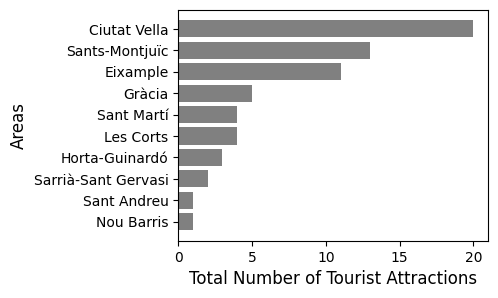

In [523]:
area_counts = df8.groupby('area')['total_tourist_attractions'].max().sort_values(ascending=True)

# Get the areas and their counts
x = area_counts.values
y = area_counts.index.to_list()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(4, 3))
ax.set_xlabel('Total Number of Tourist Attractions', fontsize=12)
ax.set_ylabel('Areas', fontsize=12)

# Plot horizontal bars with alternating grey colors
ax.barh(y, x, color='grey')
ax.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.show()

# Analysis: listings

In [524]:
area_stats = df8.groupby('area').agg(
    average_price=('price', 'mean'),
    number_of_listings=('id', 'size')
).reset_index()

# Calculate total number of listings
total_listings = df8['id'].size

# Calculate percentage of listings for each area
area_stats['percentage_listings'] = (area_stats['number_of_listings'] / total_listings) * 100

# Sort the DataFrame by average price
area_stats_sorted = area_stats.sort_values(by='average_price', ascending=False)

# Convert values to integers (no decimals)
area_stats_sorted['average_price'] = area_stats_sorted['average_price'].round().astype(int)
area_stats_sorted['percentage_listings'] = area_stats_sorted['percentage_listings'].round().astype(int)

# Reset index for better display
area_stats_sorted.reset_index(drop=True, inplace=True)
total_avg_price = area_stats_sorted['average_price'].mean()

# Calculate total number of listings
total_listings = area_stats_sorted['number_of_listings'].sum()

# Print total average price and total number of listings
print(f"Total Average Price: {total_avg_price}")
print(f"Total Number of Listings: {total_listings}")
print('average_price')
# Display the final table
print(area_stats_sorted)

# Alternatively, if you want to save it to a file
area_stats_sorted.to_csv('area_stats.csv', index=False)

Total Average Price: 105.3
Total Number of Listings: 19680
average_price
                  area  average_price  number_of_listings  percentage_listings
0             Eixample            181                6599                   34
1               Gràcia            148                1699                    9
2           Sant Martí            129                2172                   11
3  Sarrià-Sant Gervasi            120                 771                    4
4       Sants-Montjuïc            100                2258                   11
5            Les Corts             93                 399                    2
6         Ciutat Vella             85                4551                   23
7       Horta-Guinardó             78                 645                    3
8          Sant Andreu             64                 344                    2
9           Nou Barris             55                 242                    1


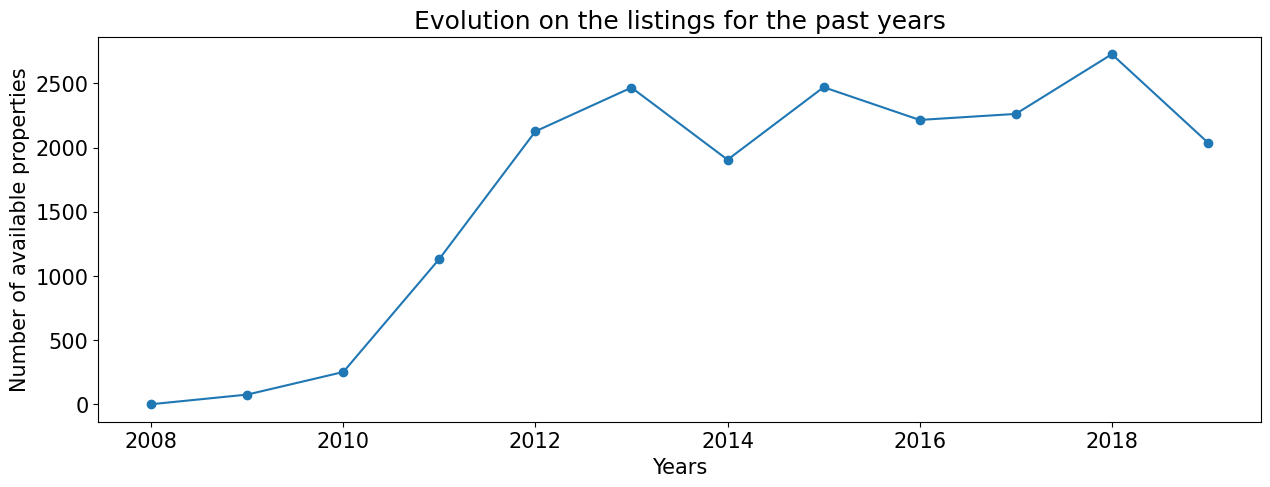

In [525]:

#listing rise  across years
# Assuming df8 is your DataFrame and 'host_since_year' is the column you're interested in
frequency = df4['listed_year'].value_counts().sort_index()  # Sort by year for a chronological plot
x = frequency.index.to_list()
y = list(frequency.values)

fig, ax = plt.subplots()
ax.set_ylabel('Number of available properties')
ax.set_xlabel('Years')
ax.set_title('Evolution on the listings for the past years')
# Change from bar to plot for a line graph
ax.plot(x, y, marker='o')  # Using markers to highlight data points

plt.show()


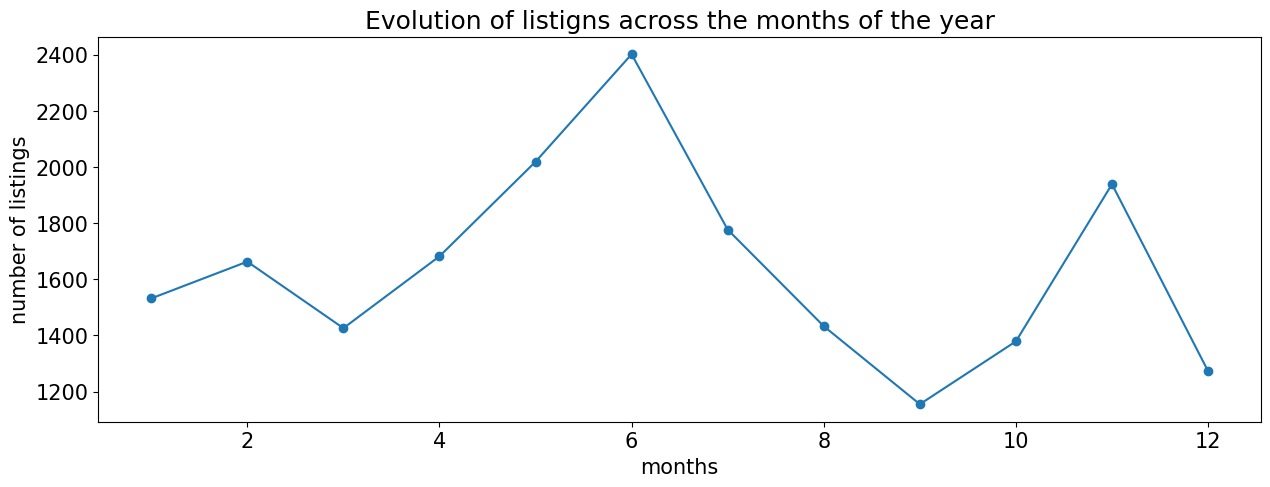

In [526]:
# Assuming df8 is your DataFrame and 'host_since_year' is the column you're interested in
frequency = df4['listed_month'].value_counts().sort_index()  # Sort by year for a chronological plot
x = frequency.index.to_list()
y = list(frequency.values)

fig, ax = plt.subplots()
ax.set_ylabel('number of listings')
ax.set_xlabel('months')
ax.set_title('Evolution of listigns across the months of the year')
# Change from bar to plot for a line graph
ax.plot(x, y, marker='o')  # Using markers to highlight data points

plt.show()

In [527]:
df4.columns

Index(['id', 'name', 'host_id', 'listed_date', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'area', 'city', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'listed_year', 'listed_month'],
      dtype='object')

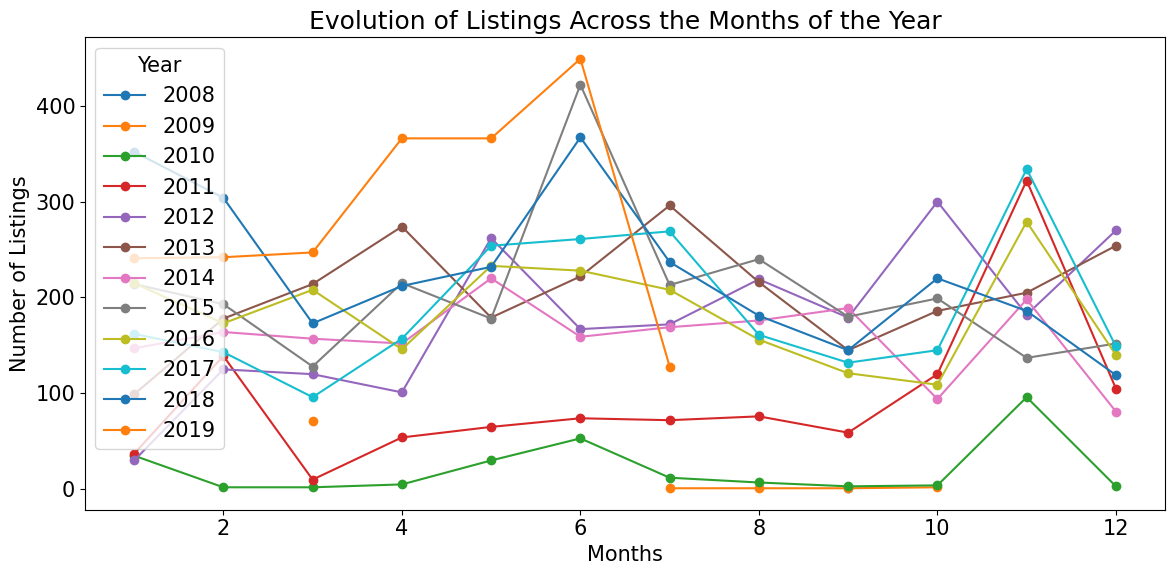

In [528]:
df4.columns
# Group the data by 'listed_year' and 'listed_month'
grouped_data = df4.groupby(['listed_year', 'listed_month']).size().reset_index(name='number_of_listings')

# Pivot the table to have 'listed_month' as index and 'listed_year' as columns
pivot_data = grouped_data.pivot(index='listed_month', columns='listed_year', values='number_of_listings')

# Plotting
plt.figure(figsize=(12, 6))

# Loop through each year to plot the data
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], marker='o', label=year)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Number of Listings')
plt.title('Evolution of Listings Across the Months of the Year')
plt.xticks(rotation=0)
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

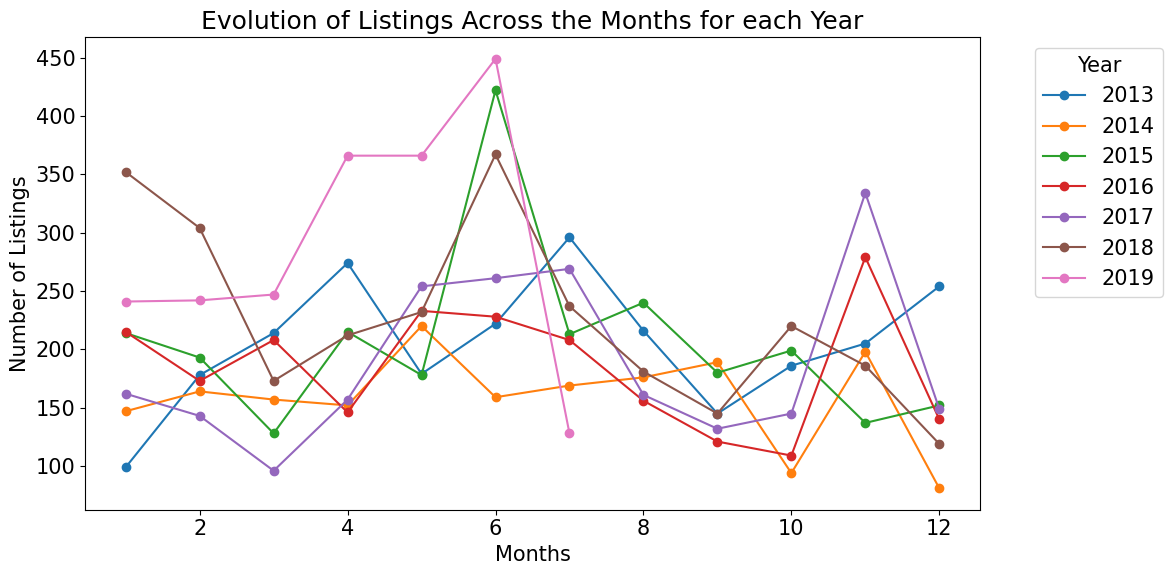

In [529]:
"""
    ONLY FROM 2012 A 2019
"""


# Filter the data to include only years after 2012
filtered_df = df4[df4['listed_year'] > 2012]

# Group the data by 'listed_year' and 'listed_month'
grouped_data = filtered_df.groupby(['listed_year', 'listed_month']).size().reset_index(name='number_of_listings')

# Pivot the table to have 'listed_month' as index and 'listed_year' as columns
pivot_data = grouped_data.pivot(index='listed_month', columns='listed_year', values='number_of_listings')

# Plotting
plt.figure(figsize=(12, 6))

# Loop through each year to plot the data
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], marker='o', label=year)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Number of Listings')
plt.title('Evolution of Listings Across the Months for each Year')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [548]:
# Calculate the total number of properties listed by the top 20 hosts
total_properties_top_20_hosts = top_20_hosts.sum()

# Calculate the percentage of total properties represented by the top 20 hosts
percentage_total_properties_top_20_hosts = (total_properties_top_20_hosts / df8['host_id'].nunique()) * 100

print("Total number of hosts:")
print(df8['host_id'].nunique())

# Calculate the average number of properties per host
average_properties_per_host = host_property_counts.mean().round(2)
print(f"Average number of properties per host: {average_properties_per_host}")

# Sort the counts in descending order and select the top 20 hosts
top_20_hosts = host_property_counts.sort_values(ascending=False).head(20)

# Convert the result to a DataFrame for better readability
top_20_hosts_df = top_20_hosts.reset_index(name='number_of_properties')
print("Number of properties listed for the top 20 hosts:")
print(top_20_hosts_df)

# Print the total number of properties listed by the top 20 hosts
print(f"Total number of properties listed by the top 20 hosts: {total_properties_top_20_hosts}")

# Print the percentage of total properties represented by the top 20 hosts
print(f"Percentage of total properties represented by the top 20 hosts: {percentage_total_properties_top_20_hosts:.2f}%")

Total number of hosts:
9660
Average number of properties per host: 2.04
Number of properties listed for the top 20 hosts:
      host_id  number_of_properties
0     4459553                   193
1   102947901                   148
2   170716140                   130
3   158023606                   129
4   193618270                   120
5   171236207                   114
6      396363                    97
7     1391607                    95
8    36607755                    91
9      299462                    84
10    1447144                    80
11    1503151                    79
12   32037490                    76
13      10704                    71
14  157250994                    58
15   10547296                    54
16    5878688                    54
17    6099660                    49
18    2439400                    47
19   47171261                    47
Total number of properties listed by the top 20 hosts: 1816
Percentage of total properties represented by the top 20 hosts

In [530]:
host_property_counts = df8.groupby('host_id').size()

print("Total number of hosts:")
print(df8['host_id'].nunique())

# Calculate the average number of properties per host
average_properties_per_host = host_property_counts.mean().round(2)
print(f"Average number of properties per host: {average_properties_per_host}")

# Sort the counts in descending order and select the top 20 hosts
top_20_hosts = host_property_counts.sort_values(ascending=False).head(20)

# Convert the result to a DataFrame for better readability
top_20_hosts_df = top_10_hosts.reset_index(name='number_of_properties')
print("Number of properties listed for the top 20 hosts:")
print(top_20_hosts_df)

Total number of hosts:
9660
Average number of properties per host: 2.04
Number of properties listed for the top 20 hosts:
      host_id  number_of_properties
0     4459553                   193
1   102947901                   148
2   170716140                   130
3   158023606                   129
4   193618270                   120
5   171236207                   114
6      396363                    97
7     1391607                    95
8    36607755                    91
9      299462                    84
10    1447144                    80
11    1503151                    79
12   32037490                    76
13      10704                    71
14  157250994                    58
15   10547296                    54
16    5878688                    54
17    6099660                    49
18    2439400                    47
19   47171261                    47


In [546]:
#calulate instant
# Replace null values with 'Unknown'
df8['instant_bookable'].fillna('Unknown', inplace=True)

# Calculate the counts of each value
count_values = df8['instant_bookable'].value_counts()

# Calculate the percentages
total_count = count_values.sum()
percentages = (count_values / total_count) * 100

# Print the results
print("Counts of host_is_superhost:")
print(count_values)
print("\nPercentages of host_is_superhost:")
print(percentages)

Counts of host_is_superhost:
instant_bookable
t    11035
f     8645
Name: count, dtype: int64

Percentages of host_is_superhost:
instant_bookable
t    56.072154
f    43.927846
Name: count, dtype: float64


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2548432508.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [545]:

#calulate super jost
# Replace null values with 'Unknown'
df8['host_is_superhost'].fillna('Unknown', inplace=True)

# Calculate the counts of each value
count_values = df8['host_is_superhost'].value_counts()

# Calculate the percentages
total_count = count_values.sum()
percentages = (count_values / total_count) * 100

# Print the results
print("Counts of host_is_superhost:")
print(count_values)
print("\nPercentages of host_is_superhost:")
print(percentages)

Counts of host_is_superhost:
host_is_superhost
f    15993
t     3687
Name: count, dtype: int64

Percentages of host_is_superhost:
host_is_superhost
f    81.265244
t    18.734756
Name: count, dtype: float64


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3736854648.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [550]:
#calulate host identify verity
# Replace null values with 'Unknown'
df8['host_identity_verified'].fillna('Unknown', inplace=True)

# Calculate the counts of each value
count_values = df8['host_identity_verified'].value_counts()

# Calculate the percentages
total_count = count_values.sum()
percentages = (count_values / total_count) * 100

# Print the results
print("Counts of host_is_superhost:")
print(count_values)
print("\nPercentages of host_is_superhost:")
print(percentages)

Counts of host_is_superhost:
host_identity_verified
f    13075
t     6605
Name: count, dtype: int64

Percentages of host_is_superhost:
host_identity_verified
f    66.438008
t    33.561992
Name: count, dtype: float64


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2093176082.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [547]:

#calculate average of all reviews
review_score_columns = [col for col in df8.columns if 'review_scores' in col]

# Calculate the average for each review_scores column
average_scores = {}
for col in review_score_columns:
    average_scores[col] = df8[col].mean()

# Print the average scores
for col, avg in average_scores.items():
    print(f"Average for {col}: {avg}")

Average for review_scores_rating: 91.10849119978504
Average for review_scores_accuracy: 9.401196397365236
Average for review_scores_cleanliness: 9.258099206882646
Average for review_scores_checkin: 9.570564109460095
Average for review_scores_communication: 9.569211127536622
Average for review_scores_location: 9.592268907563025
Average for review_scores_value: 9.041274536165636


In [ ]:
# Assuming df8 is your DataFrame and 'host_since_year' is the column you're interested in
frequency = df4['listed_month'].value_counts().sort_index()  # Sort by year for a chronological plot
x = frequency.index.to_list()
y = list(frequency.values)

fig, ax = plt.subplots()
ax.set_ylabel('id')
ax.set_xlabel('listed_month')
ax.set_title('Number of Hosts per month')
# Change from bar to plot for a line graph
ax.plot(x, y, marker='o')  # Using markers to highlight data points

plt.show()

In [ ]:
"""
 NEIGHBOURHOODS  WITH MORE LISTINGS
"""
# Get the value counts for 'neighbourhood_group_cleansed'
# Get the value counts for 'neighbourhood_group_cleansed'

value_count = df8['neighbourhood'].value_counts().head(10).sort_values(ascending=True)
x = value_count.index.to_list()
y = value_count.values

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Number of listings')
ax.set_ylabel('Neighbourhoods')

# Plot horizontal bars
ax.barh(x, y)

# Display the plot
plt.show()

# Eixample

In [540]:

#varicion listing por años

from datetime import datetime

# Convert date strings to datetime objects
df8['listed_date'] = pd.to_datetime(df8['listed_date'], format='%d/%m/%Y')

# Calculate the total number of 'id' listings before December 31, 2009
total_before_2010 = df8[df8['listed_date'] <= datetime(2009, 12, 31)]['id'].count()

# Calculate the total number of 'id' listings between December 31, 2009, and December 31, 2019
total_2010_to_2019 = df8[(df8['listed_date'] > datetime(2009, 12, 31)) & (df8['listed_date'] <= datetime(2019, 12, 31))]['id'].count()

print("Total listings before December 31, 2009:", total_before_2010)
print("Total listings between January 1, 2010, and December 31, 2019:", total_2010_to_2019)

Total listings before December 31, 2009: 77
Total listings between January 1, 2010, and December 31, 2019: 19603


In [ ]:
# Filter the DataFrame for properties in the Eixample area
eixample_props = df8[df8['area'] == 'Eixample']

# Group by the number of bedrooms
props_by_bedrooms = eixample_props.groupby('bedrooms')['id'].agg('count')

# Sort the data by the number of bedrooms in ascending order
props_by_bedrooms = props_by_bedrooms.sort_index()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# Slice the data to show only the first 10 bedrooms
y = props_by_bedrooms.index[:10]
x = props_by_bedrooms.values[:10]

plt.barh(y, x, color='skyblue')  # Horizontal bar plot
plt.ylabel('Number of Bedrooms')
plt.xlabel('Number of Properties in Eixample')
plt.title('Distribution of Properties by Number of Bedrooms in Eixample')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
eixample_props = df8[df8['area'] == 'Eixample']

# Group by the number of bedrooms
props_by_bedrooms = eixample_props.groupby('bedrooms')['id'].agg('count')

# Plotting
plt.figure(figsize=(10, 6))
x = props_by_bedrooms.index
y = props_by_bedrooms.values
plt.bar(x, y, color='grey')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Properties in Eixample')
plt.title('Distribution of Properties by Number of Bedrooms in Eixample')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
eixample_props = df8[df8['area'] == 'Eixample']

# Group by the number of bedrooms
props_by_bedrooms = eixample_props.groupby('accommodates')['id'].agg('count')

# Plotting
plt.figure(figsize=(10, 6))
x = props_by_bedrooms.index
y = props_by_bedrooms.values
plt.bar(x, y, color='grey')
plt.xlabel('accommodates')
plt.ylabel('Number of Properties in Eixample')
plt.title('Distribution of Properties by Number of Bedrooms in Eixample')
plt.xticks(rotation='horizontal')
plt.show()

# Analysis : price per night per area

In [591]:

"""
    STATISTICS OF PRICES PER NIGHT IN RELATION TO THE AREAS
"""

stats = df8.groupby('area')['price'].describe().round()
# Pivot table with descriptive statistics
pivot_price_neighbourhood = df8.pivot_table(values='price', index='area', aggfunc=['mean','min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_neighbourhood.columns = [ 'mean', 'min', 'max']

# Round the values to the nearest integer
pivot_price_neighbourhood = pivot_price_neighbourhood.round()

# Print the pivot table
print("\nPivot table with statistics:")
print(pivot_price_neighbourhood)


Pivot table with statistics:
                      mean   min     max
area                                    
Ciutat Vella          85.0   8.0  5000.0
Eixample             181.0   9.0  6000.0
Gràcia               148.0   7.0  8000.0
Horta-Guinardó        78.0   9.0  3000.0
Les Corts             93.0   9.0  3000.0
Nou Barris            55.0   9.0  2500.0
Sant Andreu           64.0  12.0  2000.0
Sant Martí           129.0   8.0  5000.0
Sants-Montjuïc       100.0   9.0  9120.0
Sarrià-Sant Gervasi  120.0   9.0  2340.0


In [590]:
"""
    STATISTICS OF PRICES PER NIGHT IN RELATION TO NEIGHBOURHOODS
"""


# do code to calculate the  following statistics for some numerical columns:
columns_to_calculate = ['price']
# Calculate overall statistics
overall_stats = df8[columns_to_calculate].describe()

# Calculate statistics by 'neighbourhood_cleansed'
stats_by_neighbourhood_cleansed = df8.groupby('neighbourhood')[columns_to_calculate].describe()

# Display overall statistics
print("Overall Statistics:")
print(overall_stats)

# Display statistics by 'neighbourhood_cleansed'
print("\nStatistics by 'neighbourhood':")
print(stats_by_neighbourhood_cleansed)

# Calculate statistics for 'price_per_night'
price_per_night_stats = df8['price'].describe()

# Calculate statistics for 'price_per_night' by 'neighbourhood_cleansed'
price_per_night_by_neighbourhood_cleansed = df8.groupby('neighbourhood')['price'].describe()

# Calculate statistics for 'price_per_night' by 'neighbourhood_group_cleansed'
price_per_night_by_neighbourhood_group_cleansed = df8.groupby('area')['price'].describe()

Overall Statistics:
              price
count  19680.000000
mean     129.744817
std      425.059583
min        7.000000
25%       40.000000
50%       65.000000
75%      112.000000
max     9120.000000

Statistics by 'neighbourhood':
                                price                                      \
                                count        mean         std   min   25%   
neighbourhood                                                               
Baró de Viver                     1.0   25.000000         NaN  25.0  25.0   
Can Baró                         44.0   73.522727   55.950347  22.0  30.0   
Can Peguera                       1.0   15.000000         NaN  15.0  15.0   
Canyelles                         3.0   46.333333   32.715949  25.0  27.5   
Ciutat Meridiana                 10.0   31.300000   24.702901  16.0  19.0   
...                               ...         ...         ...   ...   ...   
la Vila Olímpica del Poblenou   187.0  208.032086  303.447661  20.0  60.0  

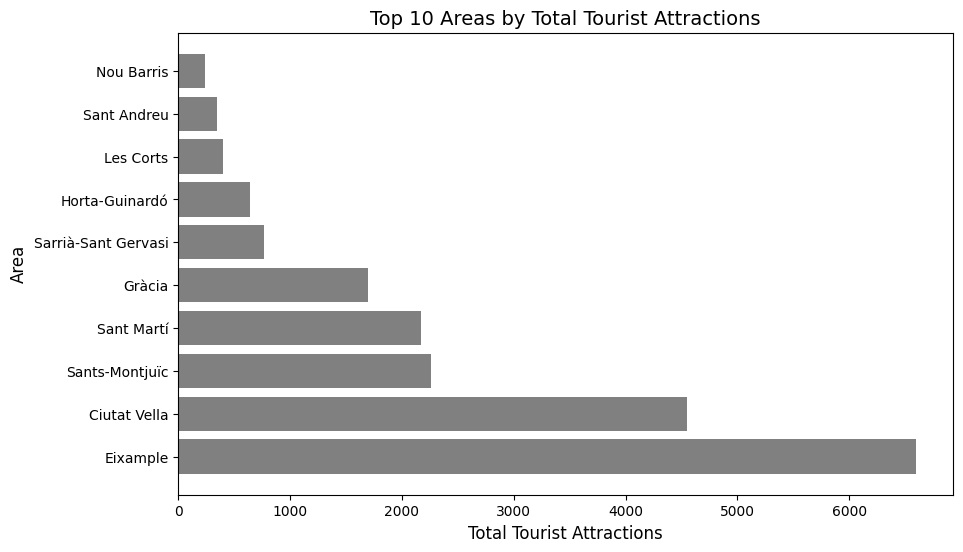

In [619]:
# Calculate the top 10 areas by the count of tourist attractions
top_10_tourist_attractions = df8.groupby('area')['total_tourist_attractions'].count().sort_values(ascending=False).head(10)

# Get the areas and their counts
x = top_10_tourist_attractions.index.to_list()
y = top_10_tourist_attractions.values

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Total Tourist Attractions', fontsize=12)
ax.set_ylabel('Area', fontsize=12)

# Plot horizontal bars with grey color
ax.barh(x, y, color='grey')
ax.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.title('Top 10 Areas by Total Tourist Attractions', fontsize=14)
plt.show()

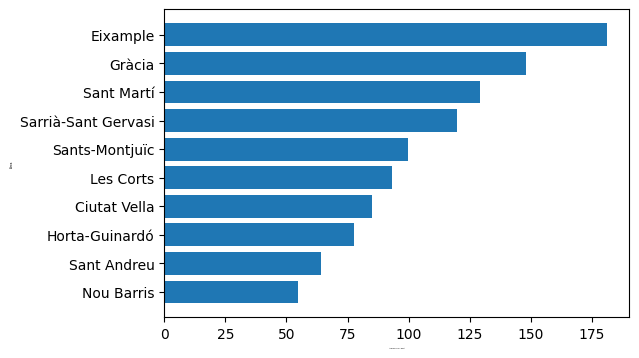

In [592]:
"""
    AREAS WITH A HIGHER AVERAGE PRICE PER NIGHT PER AREA
"""

# Calculate the average price per area
avg_price = df8.groupby('area')['price'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Area ',fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

In [593]:
pivot_room_type =df8.pivot_table(index="room_type", columns="area", values="price", aggfunc='mean')
styled_pivot_table = (pivot_room_type.style.format("{:.0f}"))
styled_pivot_table

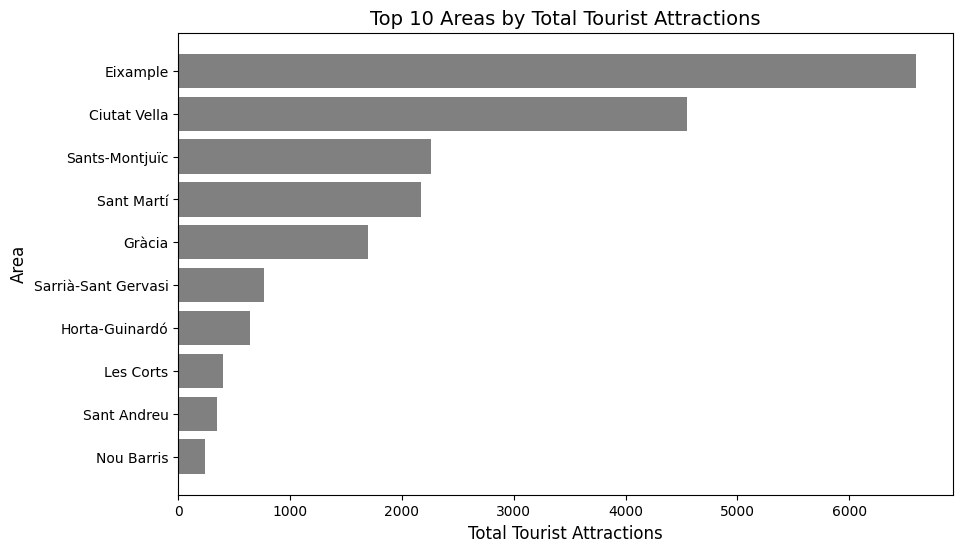

In [618]:
# Calculate the top 10 areas by the count of tourist attractions
top_10_tourist_attractions = df8.groupby('area')['total_tourist_attractions'].count().sort_values(ascending=True).head(10)

# Get the areas and their counts
x = top_10_tourist_attractions.index.to_list()
y = top_10_tourist_attractions.values

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Total Tourist Attractions', fontsize=12)
ax.set_ylabel('Area', fontsize=12)

# Plot horizontal bars with grey color
ax.barh(x, y, color='grey')
ax.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.title('Top 10 Areas by Total Tourist Attractions', fontsize=14)
plt.show()

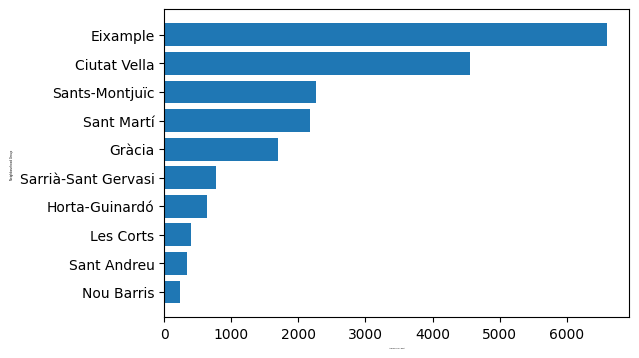

In [613]:
"""
    AREAS WITH A HIGHER MEDIAN PRICE PER NIGHT PER AREA
"""
# Calculate the average price per neighbourhood_group_cleansed
ice = df8.groupby('area')['total_tourist_attractions'].count().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = ice.index.to_list()
y = ice.values
#plt.figure(figsize=(4, 2))
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Neighbourhood Group ', fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

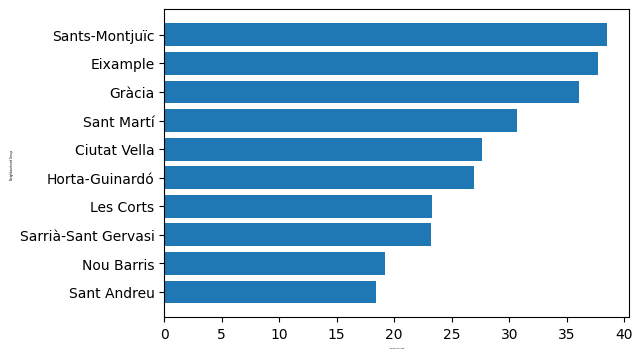

In [610]:

"""
    AREAS WITH A HIGHER MEDIAN PRICE PER NIGHT PER AREA
"""
# Calculate the average price per neighbourhood_group_cleansed
avg_price = df8.groupby('area')['number_of_reviews'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values
#plt.figure(figsize=(4, 2))
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Neighbourhood Group ', fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

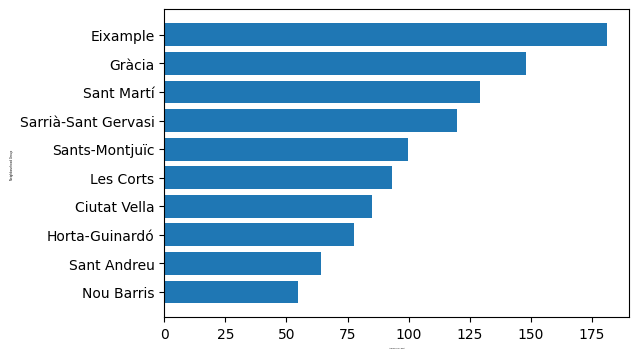

In [611]:
# Calculate the average price per neighbourhood_group_cleansed
price = df8.groupby('area')['price'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = price.index.to_list()
y = price.values
#plt.figure(figsize=(4, 2))
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Neighbourhood Group ', fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

In [595]:
"""
    STATISTICS OF PRICES PER NIGHT IN RELATION TO THE NUMBER OF GUESTS THAT THE PROPERTY ACCOMODATES
"""

stats = df8.groupby('accommodates')['price'].describe().round()
# Pivot table with descriptive statistics
pivot_price_accommodates = df8.pivot_table(values='price', index='accommodates', aggfunc=['mean', 'min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_accommodates.columns = ['mean','min', 'max']

# Round the values to the nearest integer
pivot_price_accommodates = pivot_price_accommodates.round()

# Print the pivot table
print("\nPivot table with descriptive statistics:")
print(pivot_price_accommodates)


Pivot table with descriptive statistics:
               mean    min     max
accommodates                      
1              71.0    7.0  6000.0
2              86.0    8.0  9120.0
3              90.0    9.0  2000.0
4             158.0    8.0  8000.0
5             139.0    9.0  5000.0
6             229.0    9.0  5000.0
7             213.0   15.0  5000.0
8             293.0   20.0  8000.0
9             306.0   20.0  5000.0
10            335.0   15.0  5000.0
11            254.0   40.0   655.0
12            700.0   20.0  8000.0
13            284.0  161.0   399.0
14            487.0   20.0  2173.0
15            239.0   22.0   400.0
16            422.0    9.0  1290.0
18            567.0  567.0   567.0


In [596]:
neighbourhood_df = df8.groupby('area').agg(
    number_of_listings=('id', 'size'),
    average_price=('price', 'mean')
).reset_index()

# Calculate total number of listings
total_listings = df8['id'].size

# Calculate the percentage of listings for each area
neighbourhood_df['percentage_listings'] = (neighbourhood_df['number_of_listings'] / total_listings) * 100

# Sort the DataFrame by average price in descending order
neighbourhood_df_sorted = neighbourhood_df.sort_values('average_price', ascending=False)

# Convert values to integers (no decimals)
neighbourhood_df_sorted['average_price'] = neighbourhood_df_sorted['average_price'].round().astype(int)
neighbourhood_df_sorted['percentage_listings'] = neighbourhood_df_sorted['percentage_listings'].round().astype(int)

# Transpose the DataFrame
neighbourhood_df_transposed = neighbourhood_df_sorted.set_index('area').T

# Display the final table
print(neighbourhood_df_transposed)

# Alternatively, save it to a file
neighbourhood_df_transposed.to_csv('neighbourhood_stats.csv')

area                 Eixample  Gràcia  Sant Martí  Sarrià-Sant Gervasi  \
number_of_listings       6599    1699        2172                  771   
average_price             181     148         129                  120   
percentage_listings        34       9          11                    4   

area                 Sants-Montjuïc  Les Corts  Ciutat Vella  Horta-Guinardó  \
number_of_listings             2258        399          4551             645   
average_price                   100         93            85              78   
percentage_listings              11          2            23               3   

area                 Sant Andreu  Nou Barris  
number_of_listings           344         242  
average_price                 64          55  
percentage_listings            2           1  


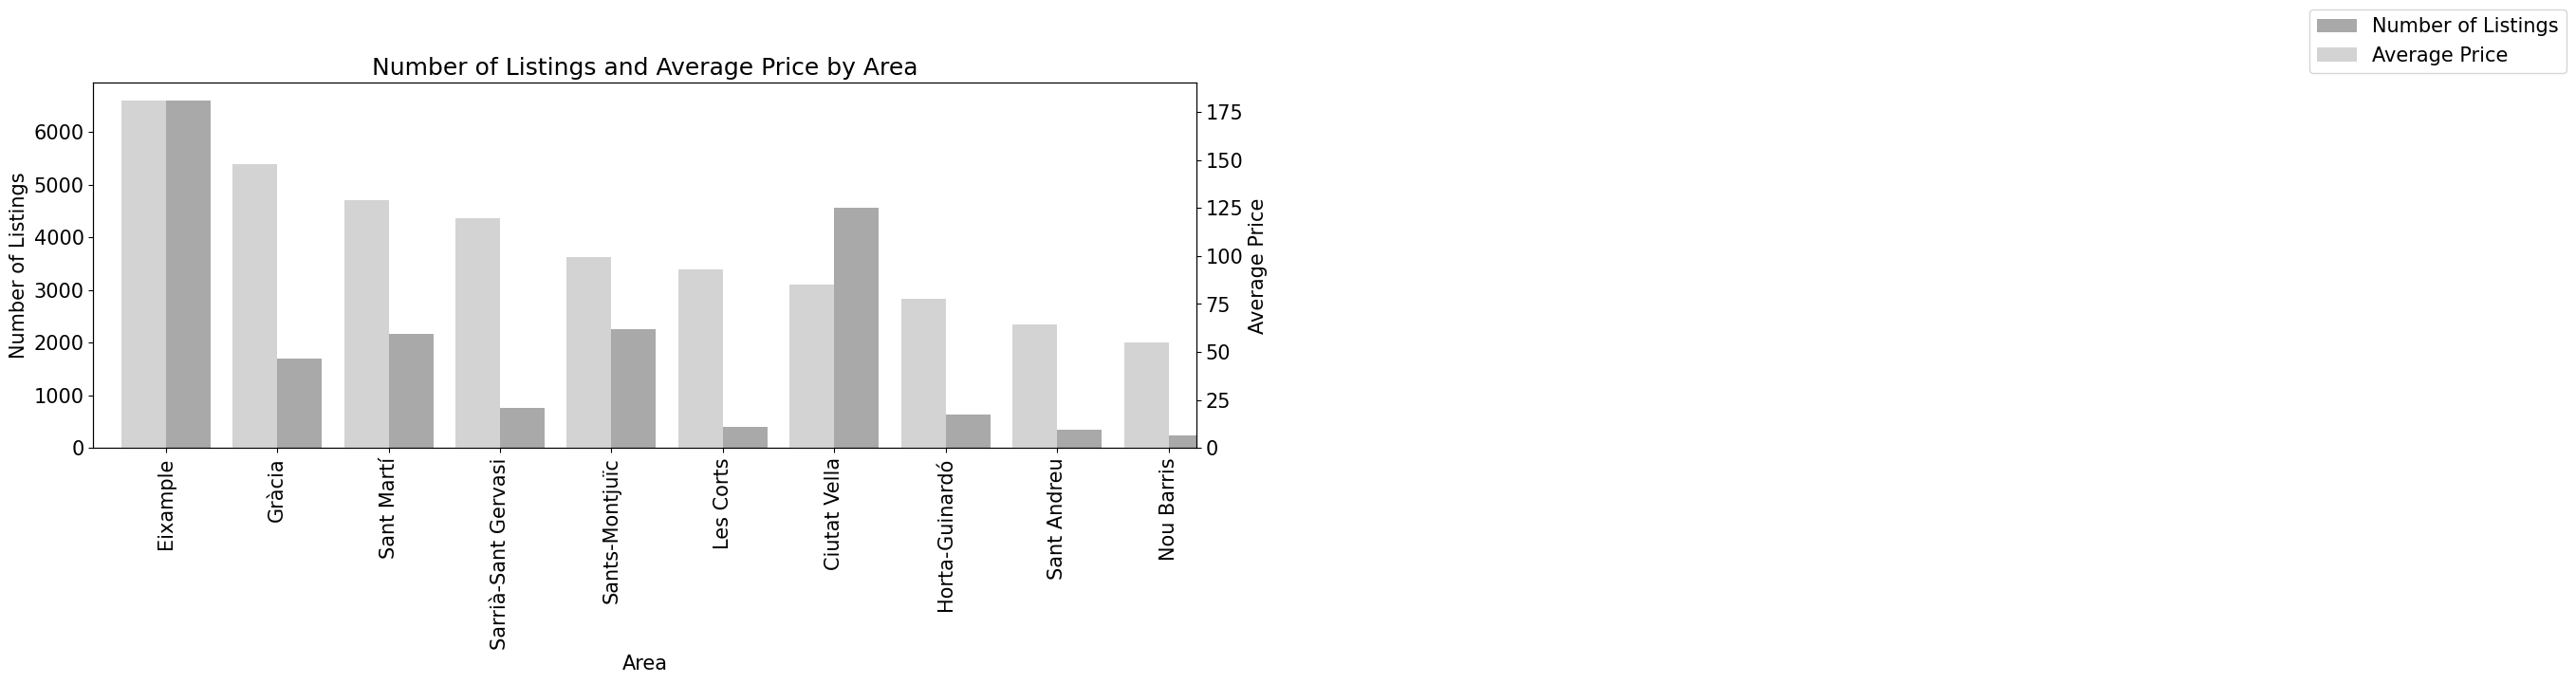

In [597]:
"""
    NUMBER OF LISTINGS AND AVERAGE PRICE PER AREA
"""


neighbourhood_df = df8.groupby('area').agg(
    number_of_listings=('id', 'size'),
    average_price=('price', 'mean')  # Fixed the aggregation function here
).reset_index()

# Set the area column as the index
neighbourhood_df.set_index('area', inplace=True)

# Sort the DataFrame by average_price
neighbourhood_df_sorted = neighbourhood_df.sort_values('average_price', ascending=False)

# Plot number of listings and median price in one bar plot
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 15,5

fig, ax1 = plt.subplots()

# Plot number of listings as bar plot
neighbourhood_df_sorted['number_of_listings'].plot(kind='bar', ax=ax1, position=0, width=0.4, color='darkgrey', label='Number of Listings')

# Create a second y-axis for the average price
ax2 = ax1.twinx()
neighbourhood_df_sorted['average_price'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='lightgrey', label='Average Price')

# Set the labels and title
ax1.set_xlabel('Area')
ax1.set_ylabel('Number of Listings', color='black')
ax2.set_ylabel('Average Price', color='black')
ax1.set_xticklabels(neighbourhood_df_sorted.index, rotation=90)
plt.title('Number of Listings and Average Price by Area')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left', bbox_to_anchor=(2, 1))

plt.show()


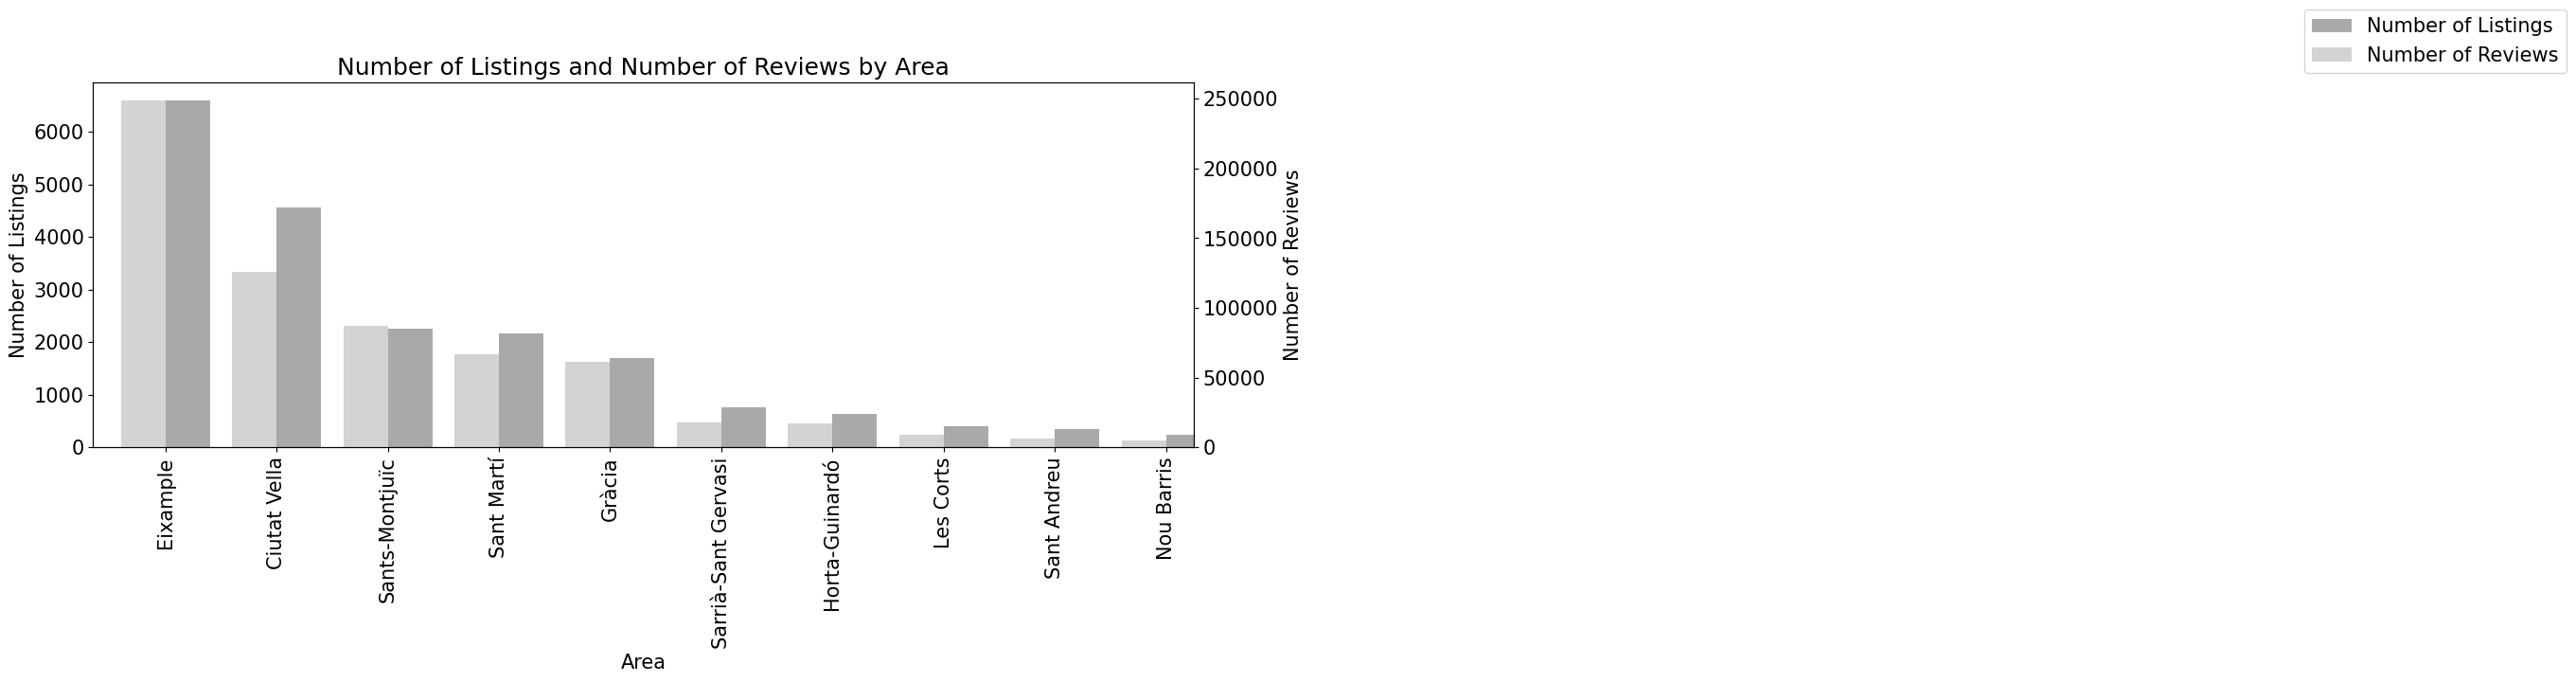

In [598]:
"""
    NUMBER OF LISTINGS AND AVERAGE PRICE PER AREA
"""

# Group by 'area' and aggregate number of listings and number of reviews
neighbourhood_df = df8.groupby('area').agg(
    number_of_listings=('id', 'size'),
    number_of_reviews=('number_of_reviews', 'sum')  # Replace 'reviews' with the correct column name for number of reviews
).reset_index()

# Set the area column as the index
neighbourhood_df.set_index('area', inplace=True)

# Sort the DataFrame by number_of_reviews
neighbourhood_df_sorted = neighbourhood_df.sort_values('number_of_reviews', ascending=False)

# Plot number of listings and number of reviews in one bar plot
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 15, 5

fig, ax1 = plt.subplots()

# Plot number of listings as bar plot
neighbourhood_df_sorted['number_of_listings'].plot(kind='bar', ax=ax1, position=0, width=0.4, color='darkgrey', label='Number of Listings')

# Create a second y-axis for the number of reviews
ax2 = ax1.twinx()
neighbourhood_df_sorted['number_of_reviews'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='lightgrey', label='Number of Reviews')

# Set the labels and title
ax1.set_xlabel('Area')
ax1.set_ylabel('Number of Listings', color='black')
ax2.set_ylabel('Number of Reviews', color='black')
ax1.set_xticklabels(neighbourhood_df_sorted.index, rotation=90)
plt.title('Number of Listings and Number of Reviews by Area')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left', bbox_to_anchor=(2, 1))

plt.show()


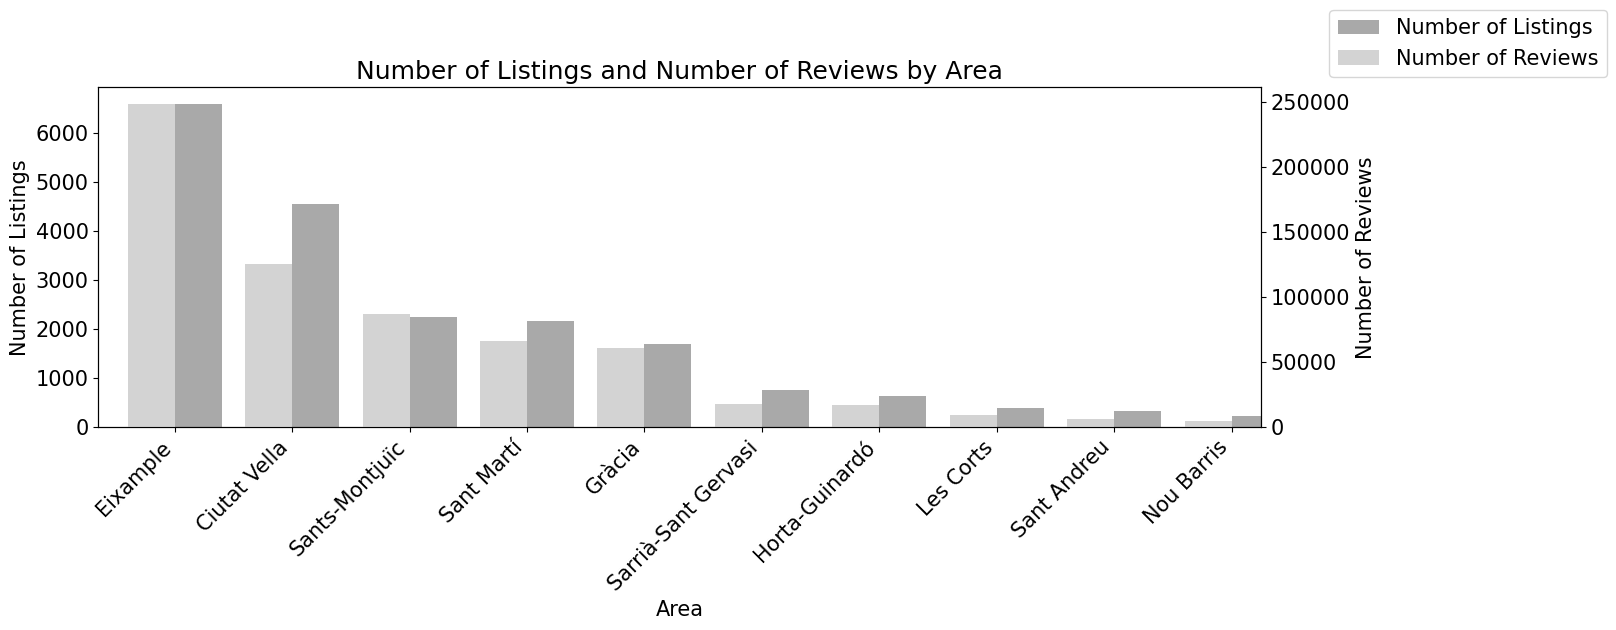

In [601]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'area' and aggregate number of listings and number of reviews
neighbourhood_df = df8.groupby('area').agg(
    number_of_listings=('id', 'size'),
    number_of_reviews=('number_of_reviews', 'sum')  # Replace 'reviews' with the correct column name for number of reviews
).reset_index()

# Set the area column as the index
neighbourhood_df.set_index('area', inplace=True)

# Sort the DataFrame by number_of_reviews
neighbourhood_df_sorted = neighbourhood_df.sort_values('number_of_reviews', ascending=False)

# Plot number of listings and number of reviews in one bar plot
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 15, 5

fig, ax1 = plt.subplots()

# Plot number of listings as bar plot
neighbourhood_df_sorted['number_of_listings'].plot(kind='bar', ax=ax1, position=0, width=0.4, color='darkgrey', label='Number of Listings')

# Create a second y-axis for the number of reviews
ax2 = ax1.twinx()
neighbourhood_df_sorted['number_of_reviews'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='lightgrey', label='Number of Reviews')

# Set the labels and title
ax1.set_xlabel('Area')
ax1.set_ylabel('Number of Listings', color='black')
ax2.set_ylabel('Number of Reviews', color='black')
ax1.set_xticklabels(neighbourhood_df_sorted.index, rotation=90)
plt.title('Number of Listings and Number of Reviews by Area')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left', bbox_to_anchor=(1.05, 1))

# Rotate the plot
angle = 45
for tick in ax1.get_xticklabels():
    tick.set_rotation(angle)

# Apply the same rotation to the figure
fig.autofmt_xdate(rotation=angle)

plt.show()


# Analysis : price per night per nighbourhood


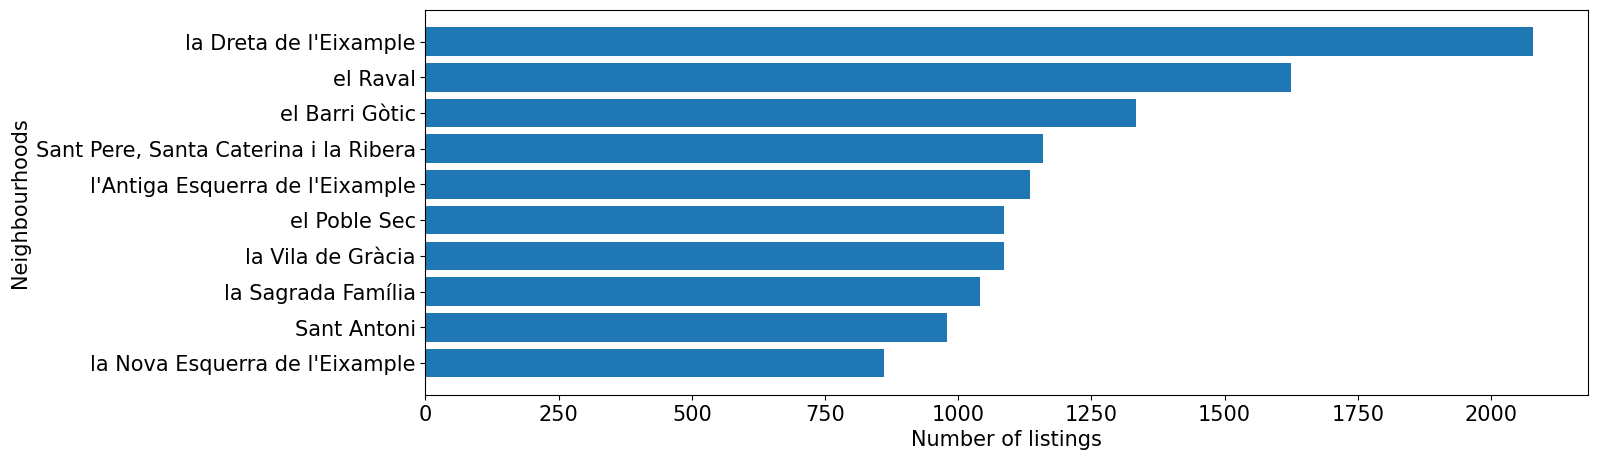

In [556]:
"""
 NEIGHBOURHOODS  WITH MORE LISTINGS
"""
# Get the value counts for 'neighbourhood_group_cleansed'
# Get the value counts for 'neighbourhood_group_cleansed'

value_count = df8['neighbourhood'].value_counts().head(10).sort_values(ascending=True)
x = value_count.index.to_list()
y = value_count.values

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Number of listings')
ax.set_ylabel('Neighbourhoods')

# Plot horizontal bars
ax.barh(x, y)

# Display the plot
plt.show()

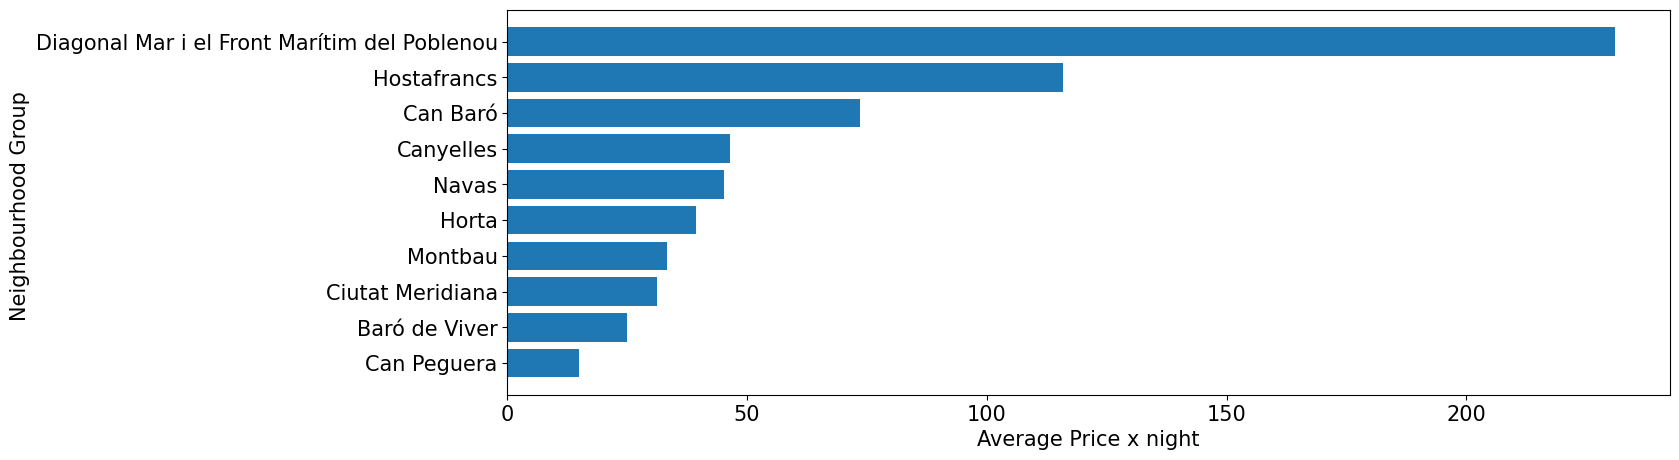

In [555]:
"""
 NEIGHBOURHOODS  WITH HIGHER AVERAGE PRICE
"""

# Calculate the average price per neighbourhood_group_cleansed
avg_price = df8.groupby('neighbourhood')['price'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Average Price x night')
ax.set_ylabel('Neighbourhood Group ')

# Plot horizontal bars with grey color
ax.barh(x, y)

# Display the plot
plt.show()

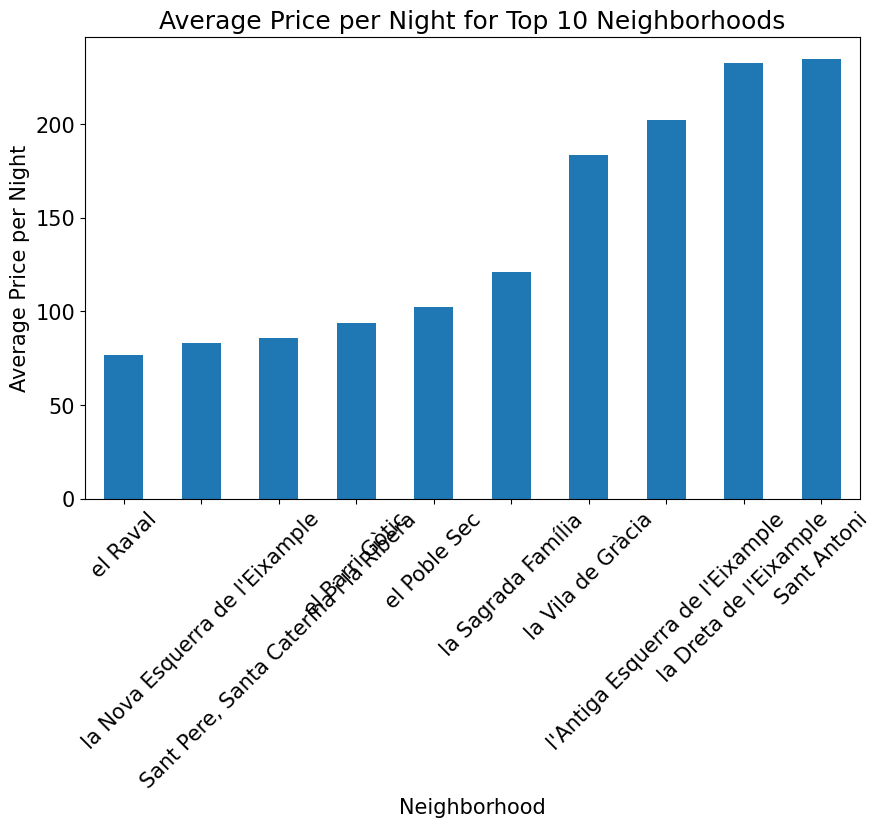

In [554]:
"""
 NEIGHBOURHOODS WITH HIGHER SCORE REVIEWS
"""

# Get the top 10 neighborhoods with the highest number of listings
top_10_neighborhoods = df8['neighbourhood'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 neighborhoods
df_top_10 = df8[df8['neighbourhood'].isin(top_10_neighborhoods)]

# Calculate the average price per night for each neighborhood
average_price_per_night = df_top_10.groupby('neighbourhood')['price'].mean().sort_values()

# Plot the average price per night for each neighborhood
average_price_per_night.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night for Top 10 Neighborhoods')
plt.xticks(rotation=45)
plt.show()


# Analysys: type of apartment

In [562]:
# Calculate descriptive statistics for 'listings' by room type
"""
    STATISCIS POR THE PRICE PER NIGHT REGARDING THE PROPERTY TYPE: ROOM/FLAT/SHARED ROOM
"""
stats = df8.groupby('room_type')['price'].describe().round()

# Pivot table with descriptive statistics
pivot_price_accommodates = df8.pivot_table(values='price', index='room_type', aggfunc=['mean', 'min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_accommodates.columns = ['mean', 'min', 'max']

# Round the values to the nearest integer
pivot_price_accommodates = pivot_price_accommodates.round().astype(int)

# Print the pivot table
print("\nPivot table with descriptive statistics (no decimals):")
print(pivot_price_accommodates)



Pivot table with descriptive statistics (no decimals):
                 mean  min   max
room_type                       
Entire home/apt   179    8  8000
Private room       80    7  9120
Shared room       326    8  8000


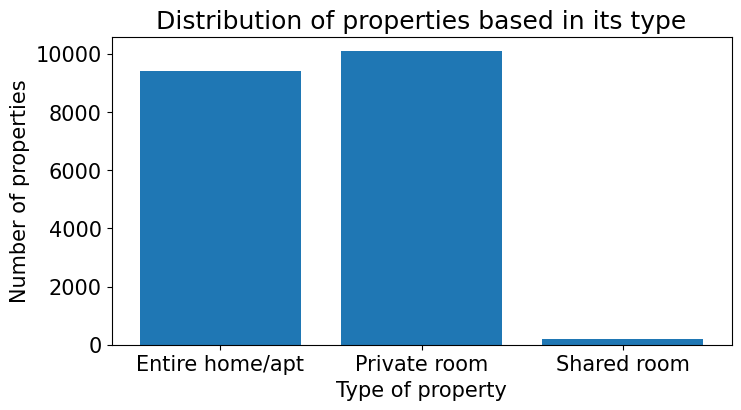

In [558]:
#what type of properties
props_by_type = df8.dropna(subset=["room_type"]).groupby("room_type")["id"].agg(["count"])
plt.figure(figsize=(8,4))
x = props_by_type.index
y = props_by_type["count"]
plt.bar(x, y)
plt.xticks(x, x, rotation="horizontal")
plt.ylabel("Number of properties")
plt.xlabel("Type of property")
#plt.xticks(rotation=0)
plt.title("Distribution of properties based in its type")
plt.show()

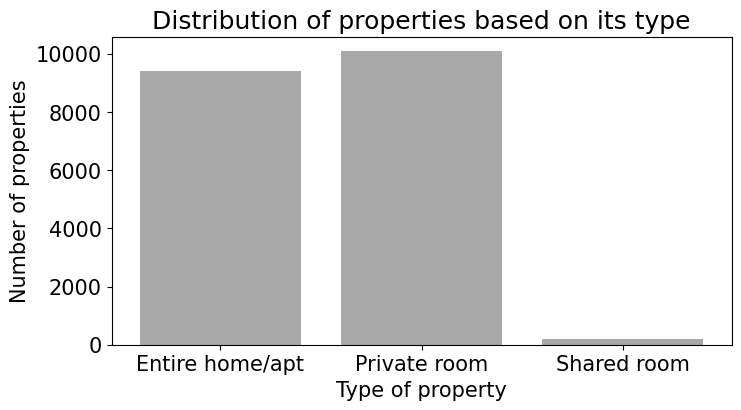

In [560]:
#PROPERTY TIPES

props_by_type = df8.dropna(subset=["room_type"]).groupby("room_type")["id"].agg(["count"])
plt.figure(figsize=(8, 4))
x = props_by_type.index
y = props_by_type["count"]
plt.bar(x, y, color='darkgrey')  # Set color to dark grey
plt.xticks(x, x, rotation="horizontal")
plt.ylabel("Number of properties")
plt.xlabel("Type of property")
plt.title("Distribution of properties based on its type")
plt.show()

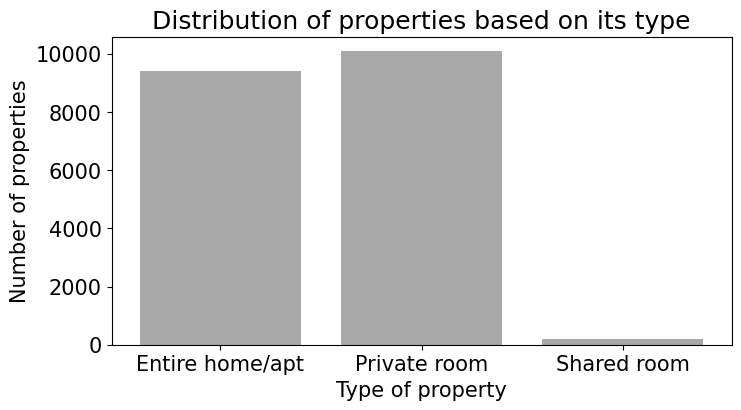

In [560]:
#PROPERTY TIPES

props_by_type = df8.dropna(subset=["room_type"]).groupby("room_type")["id"].agg(["count"])
plt.figure(figsize=(8, 4))
x = props_by_type.index
y = props_by_type["count"]
plt.bar(x, y, color='darkgrey')  # Set color to dark grey
plt.xticks(x, x, rotation="horizontal")
plt.ylabel("Number of properties")
plt.xlabel("Type of property")
plt.title("Distribution of properties based on its type")
plt.show()

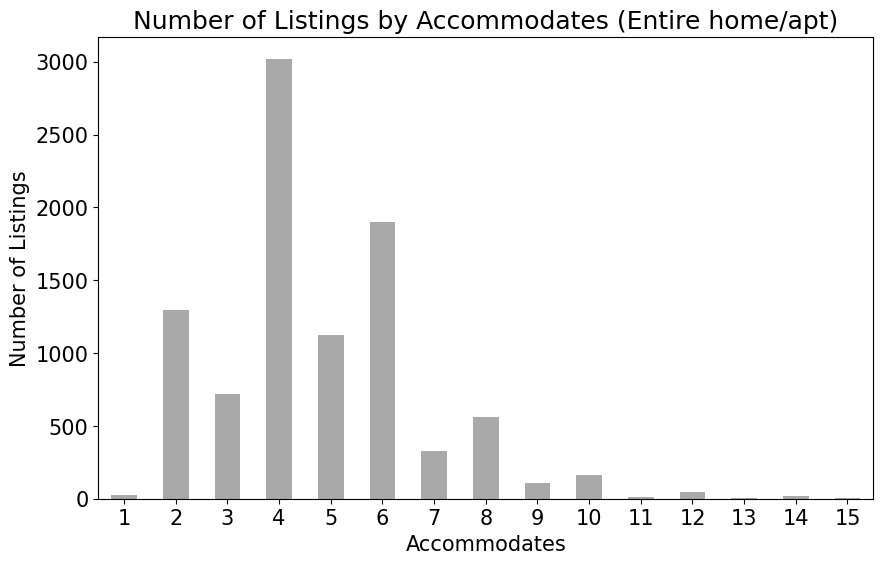

In [565]:
import matplotlib.pyplot as plt


# Group by 'accommodates' and count the number of listings
fi_df = df8[(df8['room_type'] == 'Entire home/apt') & (df8['accommodates'] <= 15)]

# Group by 'accommodates' and count the number of 'id's
accommodates_counts = fi_df.groupby('accommodates')['id'].count()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# Plotting only up to 15 people accommodated
accommodates_counts[:16].plot(kind='bar', color='darkgrey')

plt.xlabel('Accommodates')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Accommodates (Entire home/apt)')
plt.xticks(rotation=0)
plt.show()

# Analysis: reviews scoring

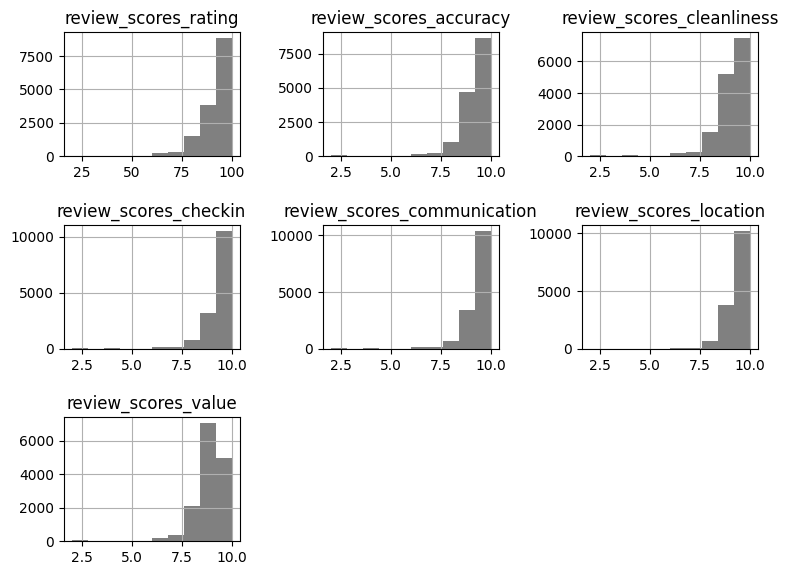

In [566]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df8.columns[df8.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(8,6))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df8[var_name].hist(bins=10,ax=ax, color='grey')
    ax.set_title(var_name, fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()
plt.show()  

# How different attributes of property correlated to the price

In [567]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF AMENITIES OF THE PROPERTY
"""

#amen = df8.dropna(subset=["amenities_count", "price"])

#x = aamen["amenities_count"]
#y = amen["price"]

#plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
#plt.scatter(x, y)

#plt.xlabel("Number of amenities in the apartment")
#plt.ylabel("Booking price per night")
#plt.title("Booking price against number of amenities in the apartment")

#plt.show()

'\n    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF AMENITIES OF THE PROPERTY\n'

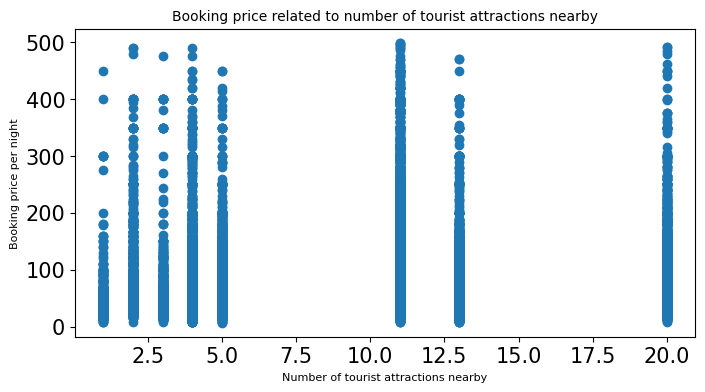

In [569]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF TOURIST ATTRACTIONS
"""
# Filter the DataFrame for rows where the price is under 1000
filtered_df = df8.dropna(subset=["total_tourist_attractions"])
filtered_df = filtered_df[filtered_df["price"] < 500]

# Convert 'total_tourist_attractions' to integer
filtered_df['total_tourist_attractions'] = filtered_df['total_tourist_attractions'].astype(int)

# Extract x and y values
x = filtered_df['total_tourist_attractions']
y = filtered_df['price']

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of tourist attractions nearby", fontsize=8)
plt.ylabel("Booking price per night", fontsize=8)
plt.title("Booking price related to number of tourist attractions nearby", fontsize=10)

plt.show()

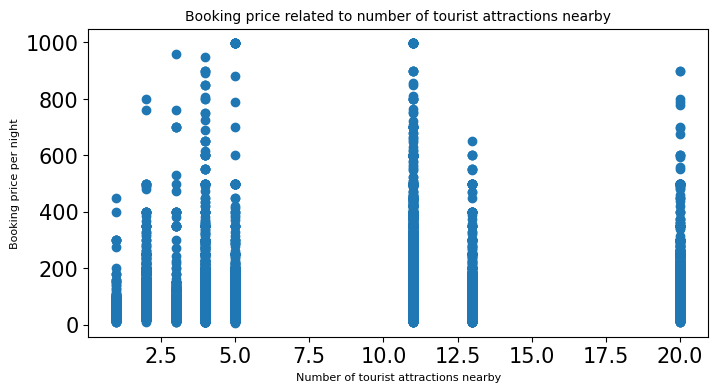

In [534]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF TOURIST ATTRACTIONS
"""
# Filter the DataFrame for rows where the price is under 1000
filtered_df = df8.dropna(subset=["total_tourist_attractions"])
filtered_df = filtered_df[filtered_df["price"] < 1000]

# Convert 'total_tourist_attractions' to integer
filtered_df['total_tourist_attractions'] = filtered_df['total_tourist_attractions'].astype(int)

# Extract x and y values
x = filtered_df['total_tourist_attractions']
y = filtered_df['price']

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of tourist attractions nearby", fontsize=8)
plt.ylabel("Booking price per night", fontsize=8)
plt.title("Booking price related to number of tourist attractions nearby", fontsize=10)

plt.show()

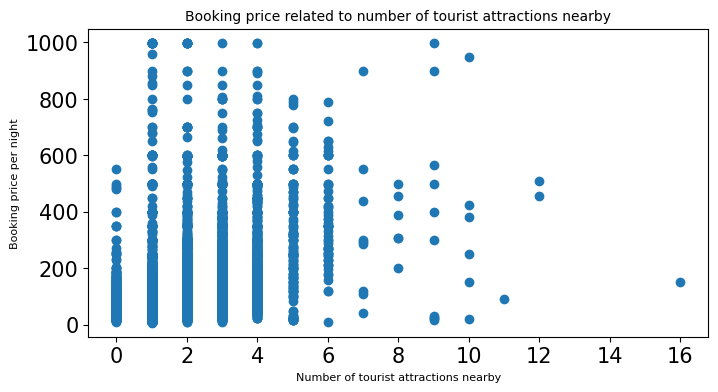

In [571]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF bedrooms
"""
# Filter the DataFrame for rows where the price is under 1000
filtered_df = df8.dropna(subset=["bedrooms"])
filtered_df = filtered_df[filtered_df["price"] < 1000]

# Convert 'total_tourist_attractions' to integer
filtered_df['bedrooms'] = filtered_df['bedrooms'].astype(int)

# Extract x and y values
x = filtered_df['bedrooms']
y = filtered_df['price']

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of tourist attractions nearby", fontsize=8)
plt.ylabel("Booking price per night", fontsize=8)
plt.title("Booking price related to number of tourist attractions nearby", fontsize=10)

plt.show()

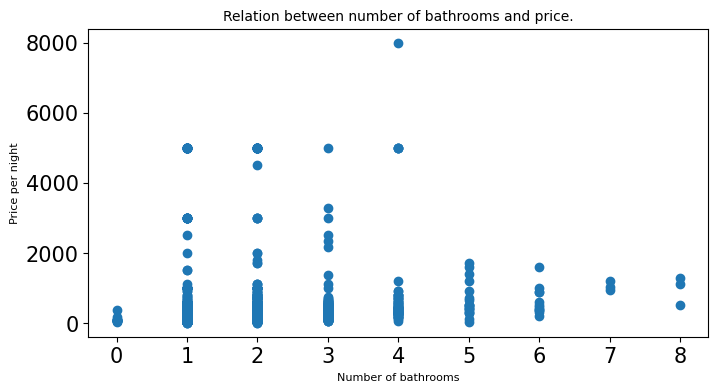

In [570]:

"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF BATHROOMS (ONLY FOR ENTIRE FLATS)
"""


bathroom_df = df8[df8['room_type'] == 'Entire home/apt']

bath = bathroom_df.dropna(subset=["bathrooms", "price"])

# Extract the 'bedrooms' and 'price' columns
x = bath["bathrooms"]
y = bath["price"]

# Create a smaller scatter plot
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of bathrooms",fontsize= 8)
plt.ylabel("Price per night",fontsize= 8)
plt.title("Relation between number of bathrooms and price.",fontsize= 10)

# Show the plot
plt.show()

In [ ]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF BEDROOMS  (ONLY FOR ENTIRE FLATS)
"""

room_df = df8[df8['room_type'] == 'Entire home/apt']

# Drop rows with missing values in 'bedrooms' and 'price'
bed = room_df.dropna(subset=['bedrooms', 'price'])

# Extract the relevant columns
x = bed['bedrooms']
y = bed['price']

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of bedrooms in property",fontsize= 8)
plt.ylabel("Booking price per night",fontsize= 8)
plt.title("Relation between number of bedrooms and price",fontsize= 10)

plt.show()

In [ ]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF BEDROOMS  (ONLY FOR ENTIRE FLATS)
"""

room_df = df8[df8['room_type'] == 'Entire home/apt']

# Drop rows with missing values in 'bedrooms' and 'price'
bed = room_df.dropna(subset=['bedrooms', 'price'])

# Extract the relevant columns
x = bed['bedrooms']
y = bed['price']

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of bedrooms in property",fontsize= 8)
plt.ylabel("Booking price per night",fontsize= 8)
plt.title("Relation between number of bedrooms and price",fontsize= 10)

plt.show()

In [ ]:
"""
    PRICE DIFFERENCE PER NIGHT ACCORDING TO THE NUMBER OF people taht accommodates  (ONLY FOR ENTIRE FLATS)
"""

accomodates_df = df8[df8['room_type'] == 'Entire home/apt']
acc = accomodates_df.dropna(subset=["accommodates", "price"])

# Extract the 'bedrooms' and 'price' columns
x = acc["accommodates"].astype(int)
y = acc["price"]

# Create a smaller scatter plot
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of people that property can accomodate", fontsize= 8)
plt.ylabel("Booking price per night", fontsize= 8)
plt.title("Booking price against number of people that can be accomodated.", fontsize= 10)

# Show the plot
plt.show()

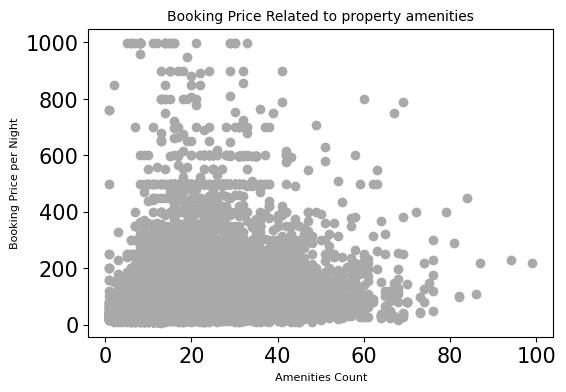

In [578]:
# Filter the DataFrame for rows where the price is under 500
filtered_df = df8.dropna(subset=["amenities_count"])
filtered_df = filtered_df[filtered_df["price"] < 1000]

# Extract x and y values
x = filtered_df['amenities_count']
y = filtered_df['price']

# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
plt.scatter(x, y, color='darkgrey')  # Set dots color to dark grey

plt.xlabel("Amenities Count", fontsize=8)
plt.ylabel("Booking Price per Night", fontsize=8)
plt.title("Booking Price Related to property amenities", fontsize=10)

plt.show()

Text(0.5, 1.0, 'Booking Price Related to number of tourist attractions nearby')

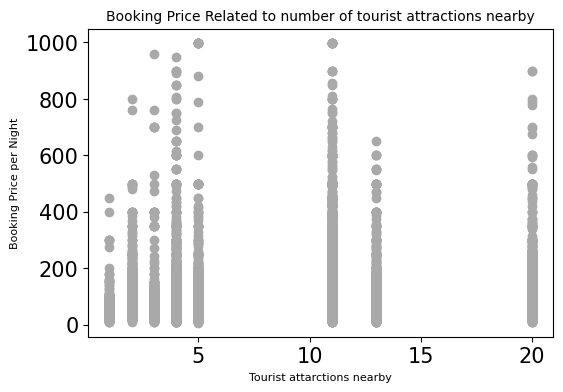

In [581]:
# Filter the DataFrame for rows where the price is under 500
filtered_df = df8.dropna(subset=["total_tourist_attractions"])
filtered_df = filtered_df[filtered_df["price"] < 1000]

# Extract x and y values
x = filtered_df['total_tourist_attractions']
y = filtered_df['price']
#total_tourist_attractions
# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
plt.scatter(x, y, color='darkgrey')  # Set dots color to dark grey

plt.xlabel("Tourist attarctions nearby", fontsize=8)
plt.ylabel("Booking Price per Night", fontsize=8)
plt.title("Booking Price Related to number of tourist attractions nearby", fontsize=10)


Text(0.5, 1.0, 'Booking Price Related to number of tourist attractions nearby')

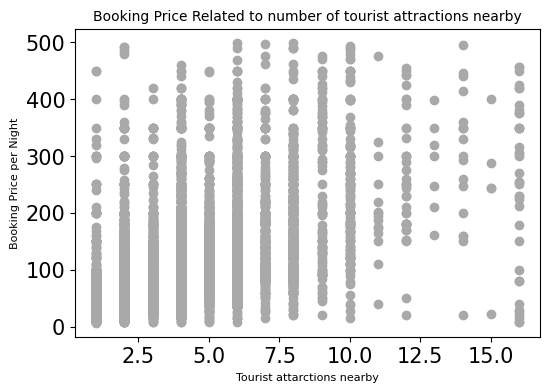

In [584]:
#e DataFrame for rows where the price is under 500
filtered_df = df8.dropna(subset=["accommodates"])
filtered_df = filtered_df[filtered_df["price"] < 500]

# Extract x and y values
x = filtered_df['accommodates']
y = filtered_df['price']
#total_tourist_attractions
# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
plt.scatter(x, y, color='darkgrey')  # Set dots color to dark grey

plt.xlabel("Tourist attarctions nearby", fontsize=8)
plt.ylabel("Booking Price per Night", fontsize=8)
plt.title("Booking Price Related to number of tourist attractions nearby", fontsize=10)

Text(0.5, 1.0, 'Booking Price Related to number of tourist attractions nearby')

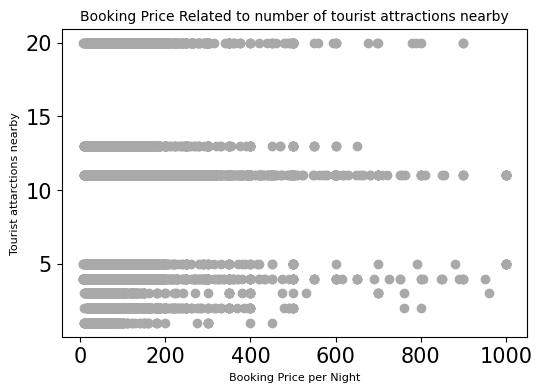

In [577]:

# Filter the DataFrame for rows where the price is under 500
filtered_df = df8.dropna(subset=["total_tourist_attractions"])
filtered_df = filtered_df[filtered_df["price"] < 1000]

# Extract x and y values
y = filtered_df['total_tourist_attractions']
x = filtered_df['price']
#total_tourist_attractions
# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
plt.scatter(x, y, color='darkgrey')  # Set dots color to dark grey

plt.ylabel("Tourist attarctions nearby", fontsize=8)
plt.xlabel("Booking Price per Night", fontsize=8)
plt.title("Booking Price Related to number of tourist attractions nearby", fontsize=10)


# MAPS

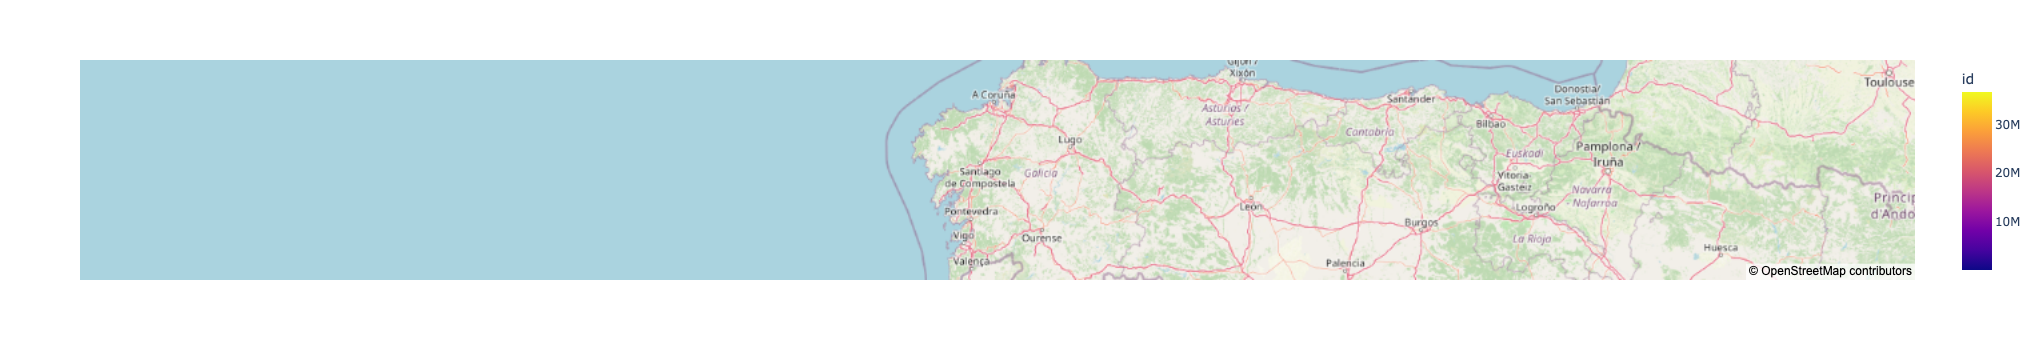

In [614]:
"""
    MAP WITH THE DENSITY OF LISTINGS
"""


import pandas as pd
import seaborn as sb
import plotly.express as px

# Datos con latitud/longitud y valores. Los nombres de columna son latitude, longitude y tot_pob


fig1listing = px.density_mapbox(df8, lat = 'latitude', lon = 'longitude', z = 'id',
                        radius = 2,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig1listing.show()
import plotly.graph_objects as go
fig1listing.write_html("density_map.html")
#import plotly.graph_objects as go
#fig = go.Figure(go.Densitymapbox(lat=['1', '2', '3'], lon=['1', '2', '3']))
#fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=0)
#fig.write_image("density_map.png")

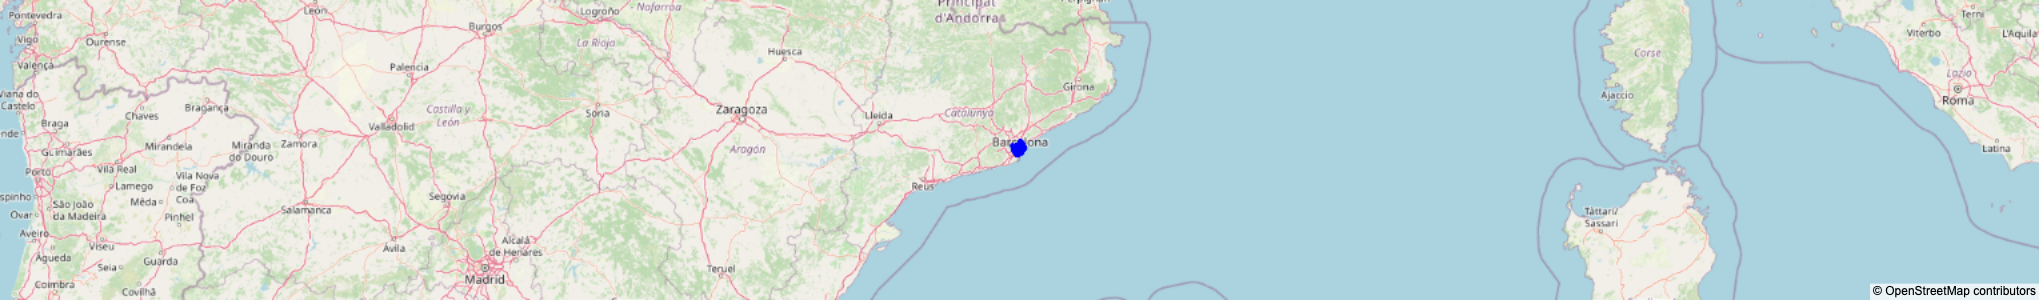

In [615]:
"""
    MAP WITH ALL THE PROPERTIES LISTED BY PRICE
"""



import plotly.express as px
import plotly.io as pio
#import kaleidoimport plotly.express as px

# Load your dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset


# Ensure the dataset has the required columns
# The dataset should have columns like 'latitude', 'longitude', 'name', 'price', etc.

# Create a Plotly scatter mapbox
fig = px.scatter_mapbox(df8, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="id",  # The column you want to show on hover (e.g., listing name)
                        hover_data={"price": True, "area": True},  # Additional data to show on hover
                        color_discrete_sequence=["blue"], 
                        zoom=6, 
                        height=300)

# Update the layout of the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()